# FLIGHT PREDICTION

**Studente: Simone Giorgio , matr. 214575**

Setup&Import

In [ ]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from IPython.display import Image
import seaborn as sns
import numpy as np
import pandas as pd
import os
np.random.seed(42)

PATH= '/content/drive/MyDrive/Colab Notebooks/Data Mining/Progetto'
IMG_PATH= '/content/drive/MyDrive/Colab Notebooks/Data Mining/Progetto/img'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Introduzione

L'obiettivo dello studio è di analizzare nel dettaglio il dataset delle prenotazioni dei voli ottenuto dal sito web "Ease my Trip" (piattaforma online Indiana per la prenotazione di Ticket di voli), con il fine di ottenere informazioni di interesse. 

Il dataset contiene informazioni riguardo prenotazioni di voli tra le top 6 città metropolitane in India.

I dati a disposizione sono stati raccolti per 50 giorni, dall' 11 Febbraio al 11 Marzo 2022.

In una prima fase si cercherà di mettere in risalto le caratteristiche delle variabili in gioco, e come queste influenzano il prezzo dei ticket. 

L'obiettivo finale sarà poi proprio quello di predire il prezzo dei ticket attraverso varie tecniche di regressione.

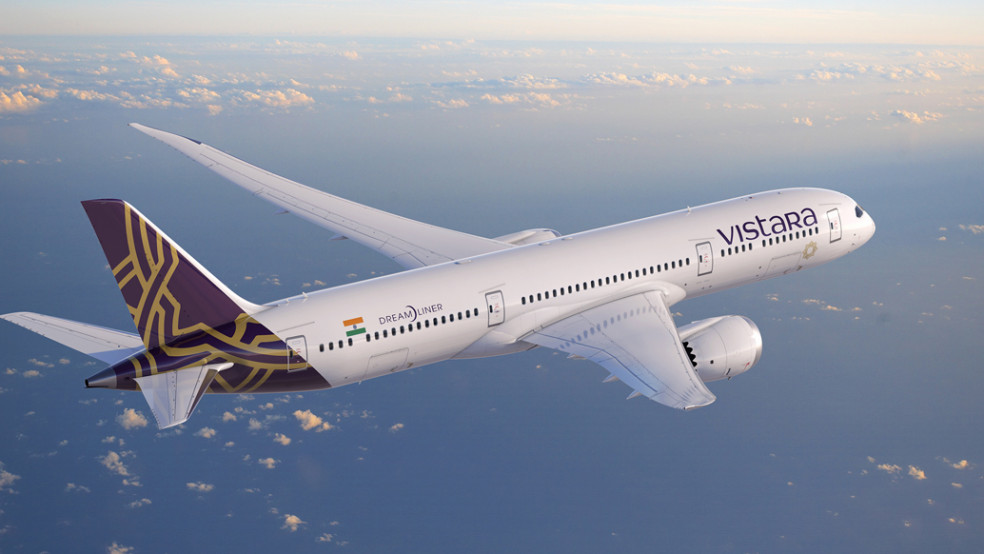

# Preprocessing

In questa prima sezione caricheremo e analizzeremo i dati a disposizione, andando ad effettuare le prime trasformazioni per cercare di offrire un dataset finale ottimale.

Inanzitutto carichiamo i due csv raw disponibili, i quali sono organizzati per classe di viaggio: economy e business.

In [ ]:
df_eco=pd.read_csv(os.path.join(PATH, 'CSV_economy.csv'))
df_eco.head()

,Unnamed: 0,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,days_left
0,0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,1
1,1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,1
2,2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,1
3,3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,1
4,4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,1


In [ ]:
df_eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206672 entries, 0 to 206671
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   Unnamed: 0  206672 non-null  int64 
 1   date        206672 non-null  object
 2   airline     206672 non-null  object
 3   ch_code     206672 non-null  object
 4   num_code    206672 non-null  int64 
 5   dep_time    206672 non-null  object
 6   from        206672 non-null  object
 7   time_taken  206672 non-null  object
 8   stop        206672 non-null  object
 9   arr_time    206672 non-null  object
 10  to          206672 non-null  object
 11  price       206672 non-null  int64 
 12  days_left   206672 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 20.5+ MB


Il primo csv riguardante i voli in classe Economy contiene (206672) record, tutte con valori non nulli, e (13) colonne che ne descrivono gli attributi dei quali a seguire illustriamo il significato:

* *'Unnamed: 0' :* progressivo (int)

* *date :* data volo (obj)

* *ch_code :* compagnia aerea (obj)

* *num_code :* numero volo (int)

* *dep_time :* orario di partenza (obj)

* *from :* città di partenza (obj)

* *time taken :* durata volo (obj)

* *stop :* numero di cambi (obj)

* *arr_time :* orario di arrivo (obj)

* *price :* prezzo in rupie indiane (int)

* *days left :* quanti giorni prima è stata effettuata la prenotazione (int)


Ora facciamo lo stesso per il secondo csv riguardante i voli in Business class:




In [ ]:
df_bus=pd.read_csv(os.path.join(PATH, 'CSV_business.csv'))
df_bus.head()

,Unnamed: 0,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,days_left
0,0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,25612,1
1,1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,25612,1
2,2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,42220,1
3,3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,44450,1
4,4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,46690,1


In [ ]:
df_bus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93487 entries, 0 to 93486
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  93487 non-null  int64 
 1   date        93487 non-null  object
 2   airline     93487 non-null  object
 3   ch_code     93487 non-null  object
 4   num_code    93487 non-null  int64 
 5   dep_time    93487 non-null  object
 6   from        93487 non-null  object
 7   time_taken  93487 non-null  object
 8   stop        93487 non-null  object
 9   arr_time    93487 non-null  object
 10  to          93487 non-null  object
 11  price       93487 non-null  int64 
 12  days_left   93487 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 9.3+ MB


In questo caso abbiamo a disposizione (93487) record anche qui tutti con valori non nulli, con i medesimi attributi visti in precedenza per la classe economy.



La prima naturale trasformazione è quella di inserire nei due dataset un attributo con la rispettiva classe prima di andarli ad unificare in un unico insieme di dati.

In [ ]:
df_eco.insert(0, "class", "Economy", True)
df_eco.head()

,class,Unnamed: 0,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,days_left
0,Economy,0,11-02-2022,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,1
1,Economy,1,11-02-2022,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,1
2,Economy,2,11-02-2022,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,1
3,Economy,3,11-02-2022,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,1
4,Economy,4,11-02-2022,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,1


In [ ]:
df_bus.insert(0, "class", "Business", True)
df_bus.head()

,class,Unnamed: 0,date,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,days_left
0,Business,0,11-02-2022,Air India,AI,868,18:00,Delhi,02h 00m,non-stop,20:00,Mumbai,25612,1
1,Business,1,11-02-2022,Air India,AI,624,19:00,Delhi,02h 15m,non-stop,21:15,Mumbai,25612,1
2,Business,2,11-02-2022,Air India,AI,531,20:00,Delhi,24h 45m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,20:45,Mumbai,42220,1
3,Business,3,11-02-2022,Air India,AI,839,21:25,Delhi,26h 30m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,44450,1
4,Business,4,11-02-2022,Air India,AI,544,17:15,Delhi,06h 40m,1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t...,23:55,Mumbai,46690,1


In [ ]:
df=pd.concat([df_eco,df_bus], ignore_index=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300159 entries, 0 to 300158
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   class       300159 non-null  object
 1   Unnamed: 0  300159 non-null  int64 
 2   date        300159 non-null  object
 3   airline     300159 non-null  object
 4   ch_code     300159 non-null  object
 5   num_code    300159 non-null  int64 
 6   dep_time    300159 non-null  object
 7   from        300159 non-null  object
 8   time_taken  300159 non-null  object
 9   stop        300159 non-null  object
 10  arr_time    300159 non-null  object
 11  to          300159 non-null  object
 12  price       300159 non-null  int64 
 13  days_left   300159 non-null  int64 
dtypes: int64(4), object(10)
memory usage: 32.1+ MB


Otteniamo un dataset che ha in totale 300159 record.

In [ ]:
df.to_csv(os.path.join(PATH, 'csv_dat

In [ ]:
df=pd.read_csv(os.path.join(PATH, 'csv_dataset_completo.csv'))


A questo punto possiamo procedere ad eliminare, utilizzando il comando drop, le colonne unnamed e data poichè poco informative.

In [ ]:
df=df.drop('Unnamed: 0',axis=1)
df=df.drop('Unnamed: 0.1',axis=1)
df=df.drop('date',axis=1)

In [ ]:
df.head()

,class,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,days_left
0,Economy,SpiceJet,SG,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,1
1,Economy,SpiceJet,SG,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,1
2,Economy,AirAsia,I5,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,1
3,Economy,Vistara,UK,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,1
4,Economy,Vistara,UK,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,1


In [ ]:
df.to_csv(os.path.join(PATH, 'csv_dataset_cleaned.csv'))

Altra trasformazione applicabile, è quella di andare ad unire gli attributi ch_code e num_code, che indicano rispettivamente il codice della compagnia assegnato dallo IATA (International Air Transport Association) ed il codice del volo, in un unico attributo che lo identificherà unicamente e che andremo a rinominare semplicemente in *flight*.

In [ ]:
df["ch_code"] = df["ch_code"].astype(str) +"-"+ df["num_code"].astype(str)

In [ ]:
df.head()

,class,airline,ch_code,num_code,dep_time,from,time_taken,stop,arr_time,to,price,days_left
0,Economy,SpiceJet,SG-8709,8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,1
1,Economy,SpiceJet,SG-8157,8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,1
2,Economy,AirAsia,I5-764,764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,1
3,Economy,Vistara,UK-995,995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,1
4,Economy,Vistara,UK-963,963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,1


In [ ]:
df.rename(columns={'ch_code': 'flight'}, inplace=True)
df = df.drop('num_code', axis=1)
df.head()

,class,airline,flight,dep_time,from,time_taken,stop,arr_time,to,price,days_left
0,Economy,SpiceJet,SG-8709,18:55,Delhi,02h 10m,non-stop,21:05,Mumbai,5953,1
1,Economy,SpiceJet,SG-8157,06:20,Delhi,02h 20m,non-stop,08:40,Mumbai,5953,1
2,Economy,AirAsia,I5-764,04:25,Delhi,02h 10m,non-stop,06:35,Mumbai,5956,1
3,Economy,Vistara,UK-995,10:20,Delhi,02h 15m,non-stop,12:35,Mumbai,5955,1
4,Economy,Vistara,UK-963,08:50,Delhi,02h 20m,non-stop,11:10,Mumbai,5955,1


In [ ]:
df.to_csv(os.path.join(PATH, 'csv_dataset_cleaned.csv'))

Analizziamo ora l'attributo stop ed i possibili valori che questo può assumere.

In [ ]:
print(df['stop'].unique())

['non-stop ' '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\t\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IXU\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Chennai\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Indore\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia RPR\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '2+-stop'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Lucknow\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia GOP\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Raipur\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Nagpur\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Surat\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia Hyderabad\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia STV\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia IDR\n\t\t\t\t\t\t\t\t\t\t\t\t'
 '1-stop\n\t\t\t\t\t\t\t\t\t\t\t\tVia VTZ\n\t\t\t\t\t\t\t\t\t\

Ai fini dell'analisi è necessario semplificare i valori che questo attributo può assumere, in particolare, grazie all'utilizzo delle espressioni regolari, andremo ripulire ed unificare tutti i voli con una sola fermata a prescindere da dove questa avvenga.

In [ ]:
df['stop'] = df['stop'].replace({'non-stop':'zero', '(1)((.|\n|\t)*)*':'one', '(2)((.|\n|\t)*)*':'two_or_more'}, regex=True)

print(df['stop'].unique())

['zero ' 'one' 'two_or_more']


In [ ]:
df.head()

,class,airline,flight,dep_time,from,time_taken,stop,arr_time,to,price,days_left
0,Economy,SpiceJet,SG-8709,18:55,Delhi,02h 10m,zero,21:05,Mumbai,5953,1
1,Economy,SpiceJet,SG-8157,06:20,Delhi,02h 20m,zero,08:40,Mumbai,5953,1
2,Economy,AirAsia,I5-764,04:25,Delhi,02h 10m,zero,06:35,Mumbai,5956,1
3,Economy,Vistara,UK-995,10:20,Delhi,02h 15m,zero,12:35,Mumbai,5955,1
4,Economy,Vistara,UK-963,08:50,Delhi,02h 20m,zero,11:10,Mumbai,5955,1


Altra trasformazione che andiamo ad effettuare riguarda gli orari di partenza (dep_time) e di arrivo (arr_time): trasformiamo l'attributo in categorico andando a dividere in 6 fasce orarie:

*Late_Night*	= [00.00 - 03.59]

*Early_Morning*	= [04.00 - 07.59]

*Morning*	= [8.00- 12.59]

*Afternoon*	= [13.00- 16.59]

*Evening*	= [17.00- 20.59]

*Night*	= [21.00- 23.59 ]




In [ ]:
def f(x):
    x=int(x[:2])
    if (x >= 4) and (x < 8):
        return 'Early_Morning'
    elif (x >= 8) and (x < 13 ):
        return 'Morning'
    elif (x >= 13) and (x < 17):
        return'Afternoon'
    elif (x >= 17) and (x < 21) :
        return 'Evening'
    elif (x >= 21) and (x < 24):
        return'Night'
    elif (x < 4):
        return'Late_Night'

In [ ]:
df['dep_time'] = df['dep_time'].apply(f)
df['arr_time'] = df['arr_time'].apply(f)
df.head()


,class,airline,flight,dep_time,from,time_taken,stop,arr_time,to,price,days_left
0,Economy,SpiceJet,SG-8709,Evening,Delhi,02h 10m,zero,Night,Mumbai,5953,1
1,Economy,SpiceJet,SG-8157,Early_Morning,Delhi,02h 20m,zero,Morning,Mumbai,5953,1
2,Economy,AirAsia,I5-764,Early_Morning,Delhi,02h 10m,zero,Early_Morning,Mumbai,5956,1
3,Economy,Vistara,UK-995,Morning,Delhi,02h 15m,zero,Morning,Mumbai,5955,1
4,Economy,Vistara,UK-963,Morning,Delhi,02h 20m,zero,Morning,Mumbai,5955,1


Trasformiamo infine l'attributo time_taken (obj), dal formato '00h 00m' in un '0.0' (float)




In [ ]:
import re

def z(x):
    x1=re.findall(r"(\d+)h", x)
    x2=re.findall(r" (\d+)m", x)
    if (len(x2) == 0) : x2="00" #mi dava errore index, su qualche record non esistevano i minuti
    x3=float(x1[0]+"."+x2[0])
    return x3



In [ ]:
df['time_taken']= df['time_taken'].apply(z)

In [ ]:
df.rename(columns={'time_taken': 'duration'}, inplace=True)

Otteniamo il dataset a seguire:

In [ ]:
df.head()

,class,airline,flight,dep_time,from,duration,stop,arr_time,to,price,days_left
0,Economy,SpiceJet,SG-8709,Evening,Delhi,2.10,zero,Night,Mumbai,5953,1
1,Economy,SpiceJet,SG-8157,Early_Morning,Delhi,2.20,zero,Morning,Mumbai,5953,1
2,Economy,AirAsia,I5-764,Early_Morning,Delhi,2.10,zero,Early_Morning,Mumbai,5956,1
3,Economy,Vistara,UK-995,Morning,Delhi,2.15,zero,Morning,Mumbai,5955,1
4,Economy,Vistara,UK-963,Morning,Delhi,2.20,zero,Morning,Mumbai,5955,1


In [ ]:
df.to_csv(os.path.join(PATH, 'csv_dataset_cleaned.csv'))

In [ ]:
df=pd.read_csv(os.path.join(PATH, 'csv_dataset_cleaned.csv'))

# Visualization

Passiamo ora alla fase di visualizzazione dei dati, per mettere in evidenza le caratteristiche del dataset ed eventuali relazioni tra i dati.

In [ ]:
df.describe(include='object')


,class,airline,flight,dep_time,from,stop,arr_time,to
count,300159,300159,300159,300159,300159,300159,300159,300159
unique,2,6,1561,6,6,3,6,6
top,Economy,Vistara,UK-706,Morning,Delhi,one,Evening,Mumbai
freq,206672,127859,3235,88814,61345,250867,88332,59100


Visualizziamo inanzitutto le compagnie in gioco e la distribuzione dei ticket tra di esse

In [ ]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO FIRST', 'Indigo',
       'Air India'], dtype=object)

Partiamo con il visualizzare il numero di voli effettuati per compagnia:

In [ ]:
df1=df.groupby(['flight','airline'],as_index=False).count()
df1.airline.value_counts()

Indigo       704
Air India    218
GO FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

Possiamo dire che Indigo è la compagnia più "popolare", con il maggior numero di linee per distacco.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


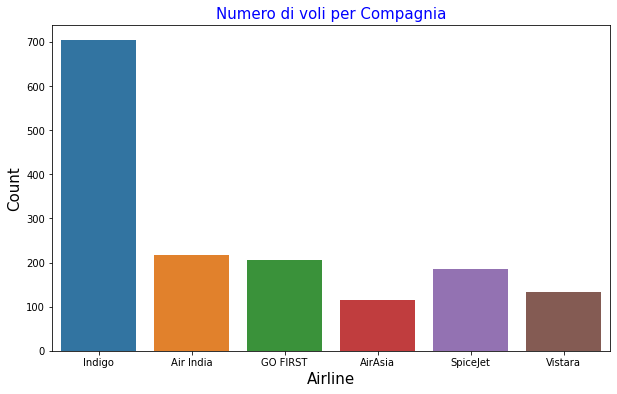

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(df1['airline'])
plt.title('Numero di voli per Compagnia', fontsize=15, color='Blue')
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

Vediamo adesso come sono distribuite le due classi, Economy e Business, tra le varie compagnie:

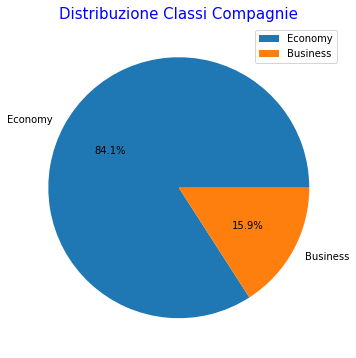

In [ ]:
df2=df.groupby(['flight','airline','class'],as_index=False).count()

plt.figure(figsize =(10,6))
plt.title('Distribuzione Classi Compagnie', fontsize=15, color='Blue')
df2['class'].value_counts().plot(kind='pie', autopct='%.1f%%')
plt.ylabel('')
plt.legend(['Economy','Business'])
plt.show()


E la distribuzione dei prezzi dei ticket tra queste due:

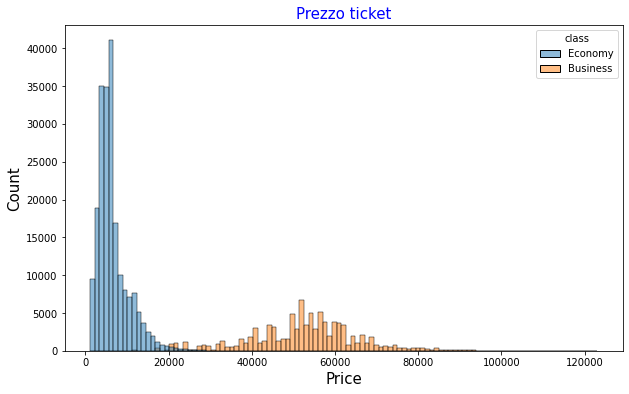

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(x = 'price', hue='class', data = df)
plt.title('Prezzo ticket', fontsize=15, color='Blue')
plt.xlabel('Price',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

La distribuzione sovrastante è composta da due gaussiane, dovute al fatto che le due categorie di ticket, Economy e Business, hanno chiaramente due differenti range di prezzo.

Come varia prezzo tra le compagnie?

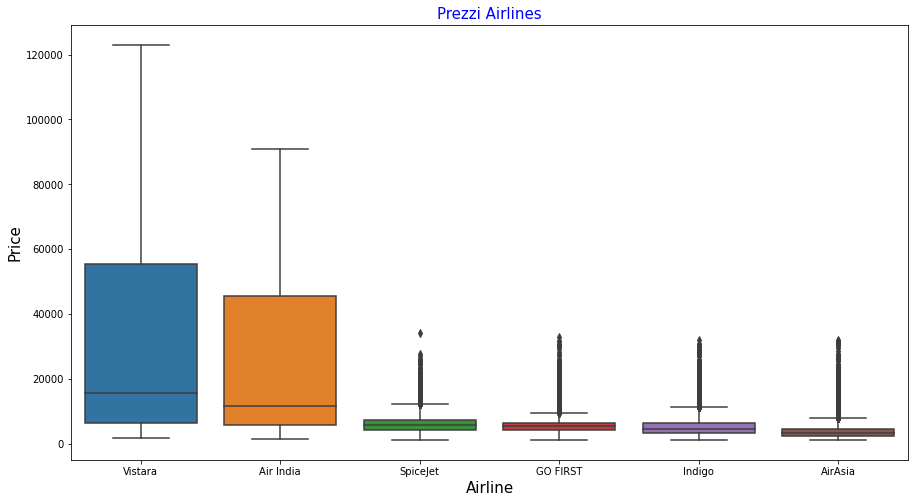

In [ ]:
plt.figure(figsize=(15,8))
sns.boxplot(x='airline',y='price',data=df.sort_values('price',ascending=False))
plt.title('Prezzi Airlines',fontsize=15, color='Blue')
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


Vistara ed Air India hanno prezzi dei ticket mediamente più alti rispetto alle concorrenti, questo è giustificato dal fatto che sono le uniche due compagnie ad offrire la Business Class, che ovviamente ha prezzi molto superiori rispetto alla Economy, come possiamo osservare nel grafico a seguire:

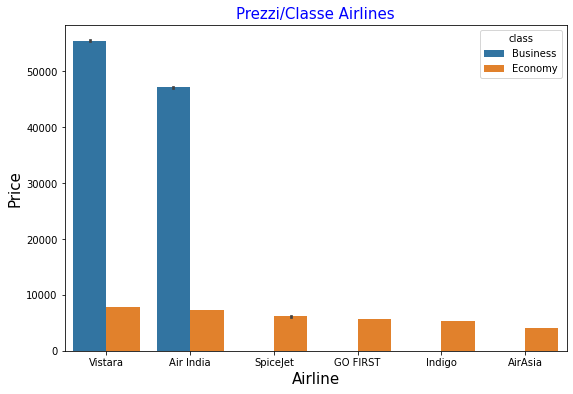

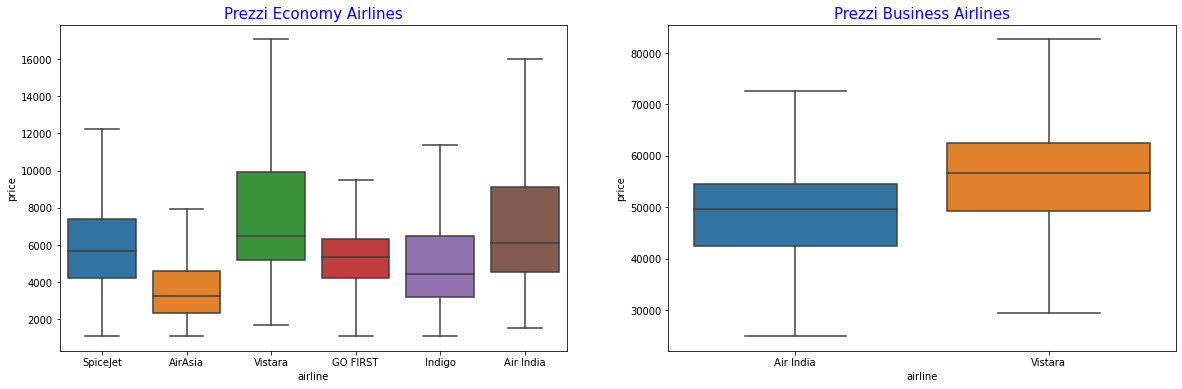

In [ ]:
plt.figure(figsize=(9, 6))
sns.barplot(x='airline',y='price',hue="class",data=df.sort_values("price",ascending=False))
plt.title('Prezzi/Classe Airlines', fontsize=15, color='Blue')
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
sns.boxplot(data= df.loc[df["class"]=='Economy'], y="price", x="airline",showfliers=False)
plt.title('Prezzi Economy Airlines',fontsize=15, color='Blue')

plt.subplot(1,2,2)
sns.boxplot(data= df.loc[df["class"]=='Business'], y="price", x="airline",showfliers=False)
plt.title('Prezzi Business Airlines',fontsize=15, color='Blue')
plt.show()

Vistara ed Air India mantengono prezzi superiori rispetto alle concorrenti anche considerando esclusivamente i voli in Economy, seguite in ordine da SpiceJet, GoFirst ed Indigo. AirAsia risulta essere la compagnia più economica.

Come varia il prezzo dei ticket al variare della fascia oraria di partenza e di arrivo?

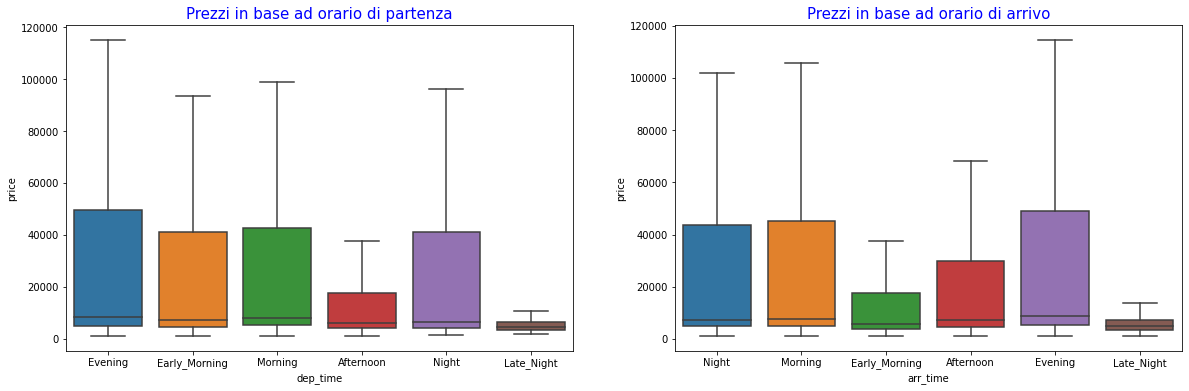

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
sns.boxplot(data=df, y="price", x="dep_time",showfliers=False)
plt.title('Prezzi in base ad orario di partenza',fontsize=15, color='Blue')

plt.subplot(1,2,2)
sns.boxplot(data=df, y="price", x="arr_time",showfliers=False)
plt.title('Prezzi in base ad orario di arrivo',fontsize=15, color='Blue')
plt.show()

La fascia oraria più economica in cui partire è quella della tarda notte, e per quanto riguarda la fascia oraria di arrivo, oltre alla tarda notte, è relativamente economico l'arrivo in mattinata presto.

Inoltre, partire nella fascia pomeridiana sembra essere una scelta leggermente più economica rispetto alle restanti fascie orarie.

I ticket più costosi sia in partenza che in arrivo sono quelli nella fascia serale.


Vediamo ora quanto è influenzato il prezzo dal variare del numero di fermate/scali a seconda da città partenza

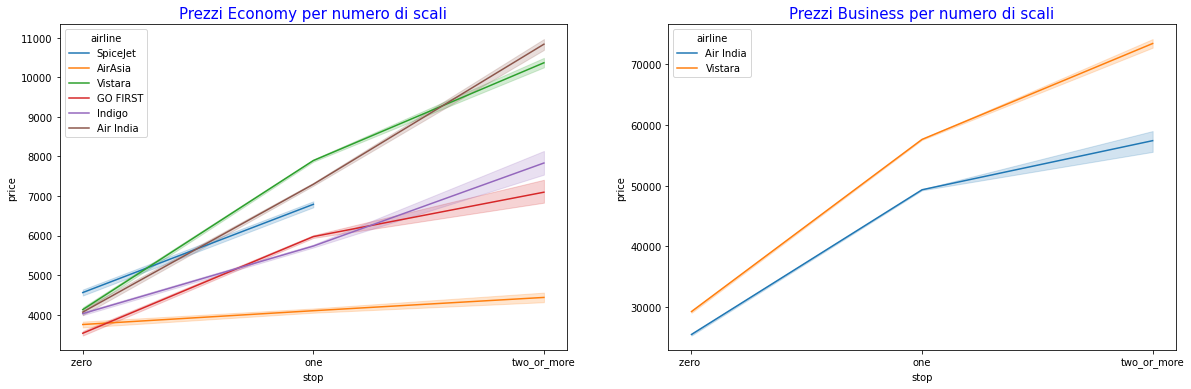

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
sns.lineplot(x='stop',y='price',color='blue',hue='airline', data = df.loc[df["class"]=='Economy'])
plt.title('Prezzi Economy per numero di scali',fontsize=15, color='Blue')

plt.subplot(1,2,2)
sns.lineplot(x='stop',y='price',color='blue',hue='airline', data = df.loc[df["class"]=='Business'])
plt.title('Prezzi Business per numero di scali',fontsize=15, color='Blue')
plt.show()


In questo caso otteniamo per entrambe le classi lo stesso comportamento: il prezzo è direttamente proporzionale al numero di scali effettuati.
Inoltre, SpiceJet è l'unica compagnia ad effettuare voli con al più uno scalo.

Vediamo ora come varia il prezzo al variare della durata del volo:

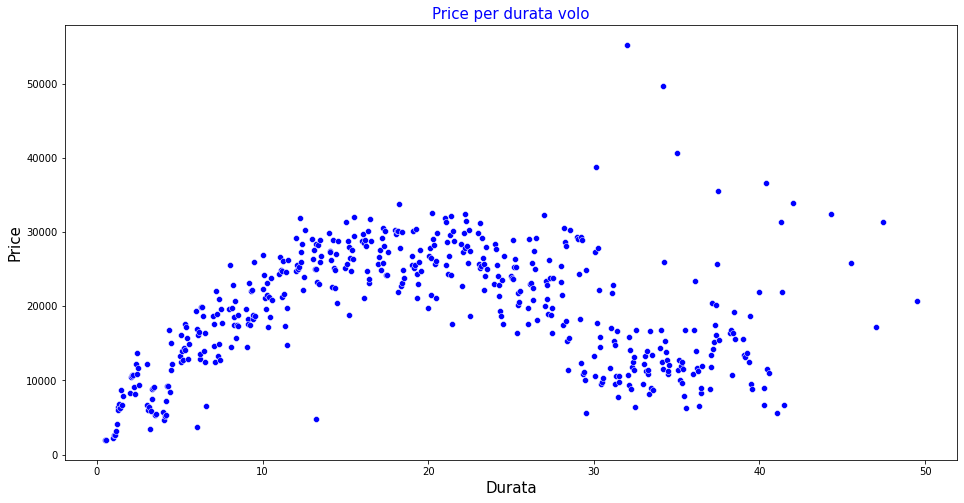

In [ ]:
df_avg = df.groupby(['duration'])['price'].mean().reset_index()
plt.figure(figsize=(16,8))
sns.scatterplot(data=df_avg,x='duration',y='price',color='blue')
plt.title('Price per durata volo',fontsize=15, color='Blue')
plt.xlabel('Durata',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()


Anche se la curva è "disturbata" da qualche elemento, possiamo notare che mediamente i ticket raggiungono il loro prezzo massimo per i voli intorno alle 20 ore, per poi riabbassarsi.

Quanto è influenzato il prezzo dalla città di partenza e da quella di destinazione?

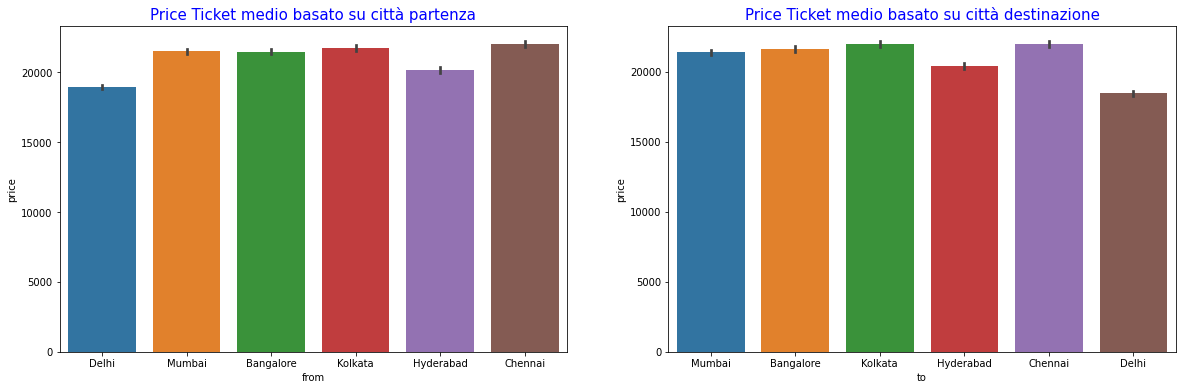

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
p = sns.barplot(data=df,x ='from', y = 'price')
plt.title('Price Ticket medio basato su città partenza',fontsize=15, color='Blue')

plt.subplot(1,2,2)
p = sns.barplot(data=df,x ='to', y = 'price')
plt.title('Price Ticket medio basato su città destinazione',fontsize=15, color='Blue')
plt.show()


I voli da e verso Delhi sono i più economici, probabilmente dovuto al fatto che essendo la capitale ha un aeroporto con una migliore proposta.
I voli in partenza e in arrivo più costosi sono quelli da Kolkata e Chennai, le restanti destinazioni sono equiparabili.

Ultimo, ma non per importanza, vediamo come varia il prezzo al variare dei giorni rimanenti alla partenza

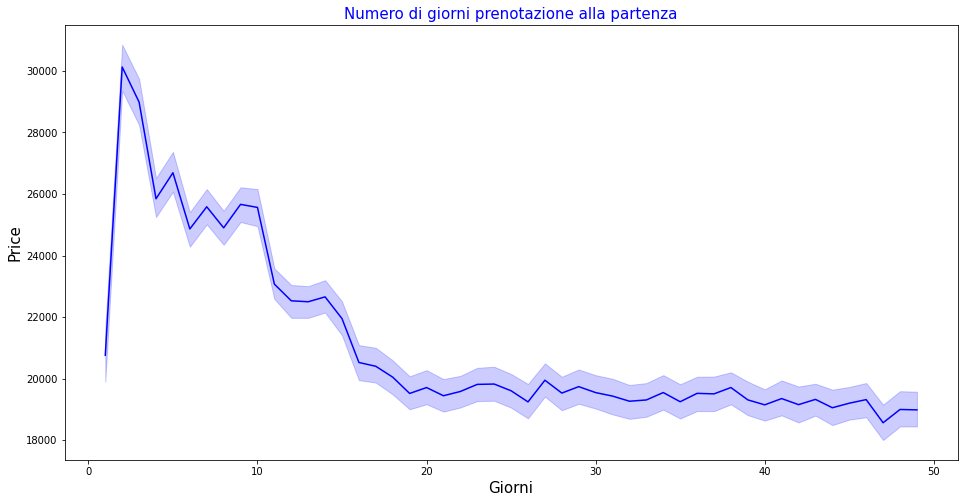

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Numero di giorni prenotazione alla partenza',fontsize=15, color='Blue')
plt.xlabel('Giorni',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

È ben chiaro che i prezzi dei biglietti rimangono relativamente costanti fino a circa 20 giorni alla partenza, dopodichè abbiamo un aumento praticamente ininterrotto fino ad arrivare a 2 giorni dalla partenza, dove abbiamo un crollo che immaginiamo dovuto alle offerte last minute per riempire gli ultimi posti rimasti inoccupati.

----------------



Terminata l'analisi grafica dell'andamento del prezzo dei ticket in relazione ai diversi attributi, andiamo a preparare i dati da fornire agli algoritmi di learning

In [ ]:
df=pd.read_csv(os.path.join(PATH, 'csv_dataset_cleaned.csv'))
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300159 entries, 0 to 300158
Data columns (total 11 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   class      300159 non-null  object 
 1   airline    300159 non-null  object 
 2   flight     300159 non-null  object 
 3   dep_time   300159 non-null  object 
 4   from       300159 non-null  object 
 5   duration   300159 non-null  float64
 6   stop       300159 non-null  object 
 7   arr_time   300159 non-null  object 
 8   to         300159 non-null  object 
 9   price      300159 non-null  int64  
 10  days_left  300159 non-null  int64  
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [ ]:
dfP=df.copy()

Iniziamo con il rimuovere l'attributo flight, poichè inutile ai fini del learning. Dopodiché trasformiamo gli attributi stop e class in numerici, ed infine trasformiamo *airline, from, to, dep_time, arr_time* con la funzione get_dummies di pandas che trasforma le colonne in matrici sparse con valori 0-1, dove l'unico 1 sulla riga sta ad indicare il valore assunto dall'attributo in quell'istanza.  

In [ ]:
dfP = dfP.drop(["flight"],axis=1)

dfP["stop"] = dfP["stop"].replace({'zero ':0,'one':1,'two_or_more':2})
dfP["class"] = dfP["class"].replace({'Economy':0,'Business':1})

dfP=pd.get_dummies(data=dfP, columns=["airline","from","to","dep_time","arr_time"])


In [ ]:
dfP.head()

,class,duration,stop,price,days_left,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,...,dep_time_Evening,dep_time_Late_Night,dep_time_Morning,dep_time_Night,arr_time_Afternoon,arr_time_Early_Morning,arr_time_Evening,arr_time_Late_Night,arr_time_Morning,arr_time_Night
0,0,2.10,0,5953,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,1
1,0,2.20,0,5953,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,2.10,0,5956,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,0,2.15,0,5955,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,2.20,0,5955,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
dfP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300159 entries, 0 to 300158
Data columns (total 35 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   class                   300159 non-null  int64  
 1   duration                300159 non-null  float64
 2   stop                    300159 non-null  int64  
 3   price                   300159 non-null  int64  
 4   days_left               300159 non-null  int64  
 5   airline_Air India       300159 non-null  uint8  
 6   airline_AirAsia         300159 non-null  uint8  
 7   airline_GO FIRST        300159 non-null  uint8  
 8   airline_Indigo          300159 non-null  uint8  
 9   airline_SpiceJet        300159 non-null  uint8  
 10  airline_Vistara         300159 non-null  uint8  
 11  from_Bangalore          300159 non-null  uint8  
 12  from_Chennai            300159 non-null  uint8  
 13  from_Delhi              300159 non-null  uint8  
 14  from_Hyderabad      

Prima di procedere vediamo se esistono delle relazioni lineari tra gli attributi con l'attributo target grazie all'ausilio della matrice di correlazione

In [ ]:
corr_matrix = dfP.corr()
corr_matrix['price'].sort_values(ascending=False)

price                     1.000000
class                     0.937861
airline_Vistara           0.360823
duration                  0.204608
stop                      0.119631
airline_Air India         0.070040
dep_time_Evening          0.070012
arr_time_Evening          0.061927
arr_time_Morning          0.031163
to_Kolkata                0.020955
from_Chennai              0.018746
to_Chennai                0.018478
dep_time_Morning          0.016864
from_Kolkata              0.016132
to_Bangalore              0.014056
from_Mumbai               0.013213
from_Bangalore            0.011689
to_Mumbai                 0.010525
arr_time_Night            0.001948
to_Hyderabad             -0.008294
dep_time_Night           -0.008576
from_Hyderabad           -0.012829
dep_time_Early_Morning   -0.017485
dep_time_Late_Night      -0.031209
arr_time_Afternoon       -0.037944
from_Delhi               -0.043283
arr_time_Early_Morning   -0.049365
to_Delhi                 -0.052526
dep_time_Afternoon  

Non spiccano relazioni di tipo lineare se non quella con la classe, andiamo comunque avanti con l'analisi facendo forza sul fatto che ci saranno relazioni non lineari che quindi non vengono catturate, e successivamente proveremo altre tecniche come la dimension reduction basata sulla feature importance.

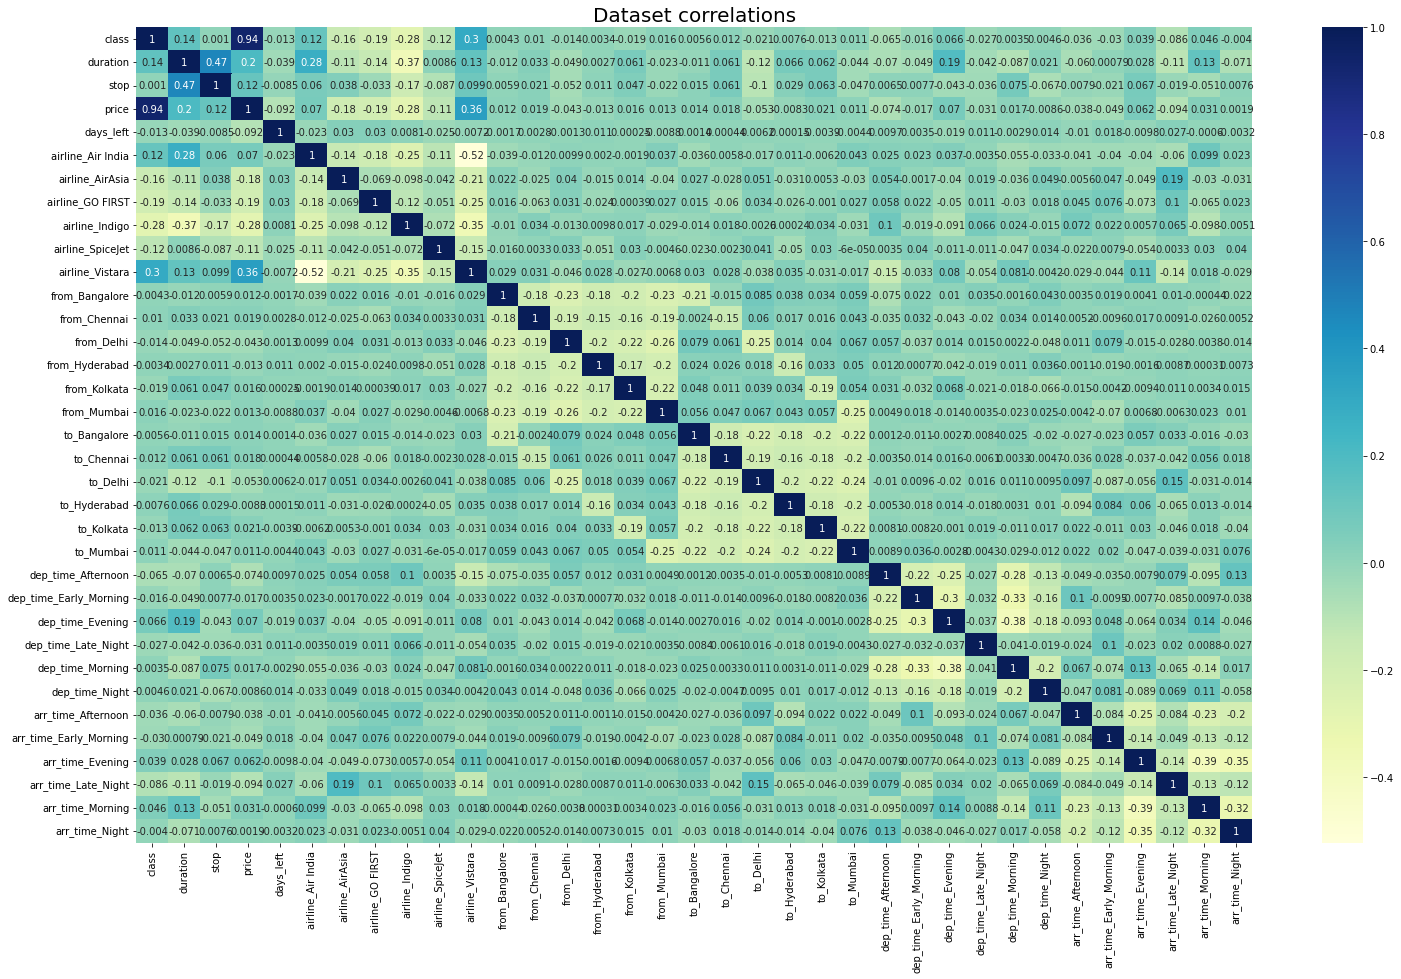

In [ ]:
plt.figure(figsize = (25, 15))
sns.heatmap(dfP.corr(), annot = True, cmap="YlGnBu")
plt.title("Dataset correlations", size=20)
plt.show()

In [ ]:
dfP.to_csv(os.path.join(PATH, 'dfP.csv'))

In [ ]:
dfP=pd.read_csv(os.path.join(PATH, 'dfP.csv'))
dfP=dfP.drop('Unnamed: 0',axis=1)

# Predizione

Passiamo ora alla fase di predizione, andando a comparare i risultati ottenuti dai regressori presi in esame. Le misure di valutazione di questi ultimi che verranno valutate sono:

-**R2 score**, o coefficiente di determinazione, indica quanto la regressione sia un buon modello per spiegare la variabilità dei dati; rappresenta la proporzione della varianza nella variabile dipendente espressa dal modello di regressione lineare.

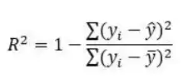

-**Mean Absolute Error**, rappresenta il valore medio della differenza assoluta tra i valori reali e predetti nel dataset. (media dei residui)

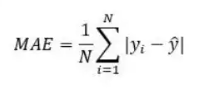

-**Mean Squared Error**, rappresenta la media dei quadrati delle differenze tra i valori reali e predetti. (varianza dei residui)

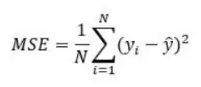

-**Root Mean Squared Error**, misura la deviazione standard dei residui

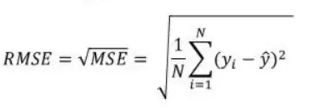

**Normalizzazione e Splitting**

In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate

Normalizziamo tra 0e1 gli attributi duration e days_left

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
vars = ['duration', 'days_left']
dfP[vars] = scaler.fit_transform(dfP[vars])

Split dataset utilizzando il 20% di esso come test set

In [ ]:
X=dfP.drop(['price'],axis=1)
Y=dfP['price']

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(240127, 34) (240127,)
(60032, 34) (60032,)


In [ ]:
X.tail()

,class,duration,stop,days_left,airline_Air India,airline_AirAsia,airline_GO FIRST,airline_Indigo,airline_SpiceJet,airline_Vistara,...,dep_time_Evening,dep_time_Late_Night,dep_time_Morning,dep_time_Night,arr_time_Afternoon,arr_time_Early_Morning,arr_time_Evening,arr_time_Late_Night,arr_time_Morning,arr_time_Night
300154,1,10.05,1,49,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0
300155,1,10.25,1,49,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
300156,1,13.50,1,49,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
300157,1,10.00,1,49,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
300158,1,10.05,1,49,0,0,0,0,0,1,...,0,0,1,0,0,0,1,0,0,0


Andiamo inanzitutto a definire due metodi molto importanti:

*grid_searching*, il quale ci consentirà di effetuare una Grid Search sui parametri in modo da andare a selezionare i più interessanti di ogni regressore.

*compute metrics*, per effettuare i calcoli delle metriche prese in considerazione e inserirli nella struttura dati finale.

In [ ]:
import pickle


In [ ]:
df_clfs_tot = [] #la uso per visualizzare in dataframe la lista sottostante
df_clfs = [] #questa me la mantengo come lista a cui appendo i risultati ottenuti di volta in volta da ogni modello

dt_clfs_tot = None
dt_clfs = None


def grid_searching(model, name, xtrain, xtest, ytrain, ytest, k_feature, params=None):
    clf = {}
    
    # grid search
    if params is not None:
        gs = GridSearchCV(estimator=model, cv=5, n_jobs=-1, param_grid=params, scoring='neg_mean_squared_error')
        gs.fit(xtrain, ytrain)        
        best_model = gs.best_estimator_
    else:
        best_model = model.fit(xtrain, ytrain)

    scores = cross_validate(best_model, xtrain, ytrain, cv=5, return_train_score=True, scoring=['r2','neg_mean_absolute_error','neg_mean_squared_error'])

    #pred
    ypred = best_model.predict(xtest)
    
    df = df_clfs        
    #df= df_clfs_top

    #saving
    if k_feature:
        model_name = 'top3_'+name
    else:
        model_name = name
            
    #fill
    clf['Name']= model_name
    clf['Type'] = best_model
    compute_metrics(df, clf, scores, ypred, ytest)
    
    #with open('/content/drive/MyDrive/Colab Notebooks/Data Mining/Progetto/Saved_models/'+model_name, 'wb') as f:
     #   pickle.dump(best_model, f)

    #salvo risultato classificatori
    #with open('/content/drive/MyDrive/Colab Notebooks/Data Mining/Progetto/Saved_models/df_clfs', 'wb') as f:
        #pickle.dump(df_clfs, f)


    #salvo risultato classificatore top_k
    #with open('/content/drive/MyDrive/Colab Notebooks/Data Mining/Progetto/Saved_models/df_clfs_topk', 'wb') as f:
     #   pickle.dump(df_clfs, f)

def compute_metrics(dataframe, clf, scores, yprediction, ytest):    

    clf['R2_train'] = abs(np.mean(scores['train_r2']))
    clf['R2_test'] = abs(r2_score(y_pred=yprediction, y_true=ytest))

    clf['MAE_train'] = abs(np.mean(scores['train_neg_mean_absolute_error']))
    clf['MAE_test'] = abs(mean_absolute_error(y_pred=yprediction, y_true=ytest))

    clf['MSE_train'] = abs(np.mean(scores['train_neg_mean_squared_error']))  
    clf['MSE_test'] = abs(mean_squared_error(y_pred=yprediction, y_true=ytest))

    toAdd = True
    for i in range(len(dataframe)):
        if dataframe[i]['Name'] in clf['Name']:
            dataframe[i] = clf
            toAdd = False
            break
    if toAdd:
        dataframe.append(clf)

**Linear Models**

In [ ]:
from sklearn.linear_model import LinearRegression 

estimator = LinearRegression()
grid_searching(k_feature=False, model=estimator, name='LinearRegression', xtrain=xtrain, xtest=xtest, ytest=ytest, ytrain=ytrain)


In [ ]:
from sklearn.linear_model import SGDRegressor

params_ = {
    'alpha' : [0.0001, 0.005, 0.01, 0.1, 0.2],
    'loss' : ['squared_loss', 'epsilon_insensitive', 'squared_epsilon_insensitive']
}
estimator = SGDRegressor()
grid_searching(k_feature=False, model=estimator, name='SGDReg', params=params_, xtrain=xtrain, xtest=xtest, ytest=ytest, ytrain=ytrain)

In [ ]:
from sklearn.linear_model import BayesianRidge

params_ = {
    'alpha_1' : [0.0001, 0.001, 0.01, 0.1, 1., 5., 10., 50., 100.]
}
estimator = BayesianRidge()
grid_searching(k_feature=False, model=estimator, name='BayesRidReg', params=params_,xtrain=xtrain, xtest=xtest, ytest=ytest, ytrain=ytrain)

In [ ]:
dt_clfs_tot = pd.DataFrame(df_clfs)
dt_clfs_tot

,Name,Type,R2_train,R2_test,MAE_train,MAE_test,MSE_train,MSE_test
0,LinearRegression,LinearRegression(),0.909579,0.910471,4526.822422,4502.902151,4.663710e+07,4.590942e+07
1,SGDReg,"SGDRegressor(alpha=0.01, loss='squared_epsilon...",0.901358,0.640348,4850.871929,11782.852752,5.087768e+07,1.844254e+08
2,BayesRidReg,BayesianRidge(alpha_1=0.0001),0.909579,0.910471,4526.786980,4502.915344,4.663710e+07,4.590936e+07


In [ ]:
#salvo risultato classificatori
with open('/content/drive/MyDrive/Colab Notebooks/Data Mining/Progetto/Saved_models/df_clfs', 'wb') as f:
  pickle.dump(df_clfs, f)

**Tree Models**

Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor

params_tree = {
    'splitter': ['best', 'random'],
    'criterion' : ['mse', 'friedman_mse', 'mae'],
}
estimator=DecisionTreeRegressor()
grid_searching(k_feature=False, model=estimator, name='DecisionTreeReg', params=params_tree, xtrain=xtrain, xtest=xtest, ytest=ytest, ytrain=ytrain)

In [ ]:
from sklearn.tree import ExtraTreeRegressor

params_ = {
    'splitter': ['best', 'random']
}

estimator=ExtraTreeRegressor()
grid_searching(k_feature=False, model=estimator, name='ExtraTreeReg', params=params_ , xtrain=xtrain, xtest=xtest, ytest=ytest, ytrain=ytrain)

In [ ]:
df_clfs= pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Data Mining/Progetto/Saved_models/df_clfs', 'rb'))
df_clfs_tot=pd.DataFrame(df_clfs)
df_clfs_tot

,Name,Type,R2_train,R2_test,MAE_train,MAE_test,MSE_train,MSE_test
0,LinearRegression,LinearRegression(),0.909579,0.910471,4526.822422,4502.902151,4.663710e+07,4.590942e+07
1,SGDReg,"SGDRegressor(alpha=0.01, loss='squared_epsilon...",0.901358,0.640348,4850.871929,11782.852752,5.087768e+07,1.844254e+08
2,BayesRidReg,BayesianRidge(alpha_1=0.0001),0.909579,0.910471,4526.786980,4502.915344,4.663710e+07,4.590936e+07
3,DecisionTreeReg,DecisionTreeRegressor(criterion='mse'),0.999408,0.975741,55.775183,1191.124303,3.055727e+05,1.243994e+07
4,ExtraTreeReg,ExtraTreeRegressor(splitter='best'),0.999408,0.976083,55.775183,1182.844363,3.055727e+05,1.226460e+07


**Nearest Neighbor Regressor**

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

params_ = {
    'n_neighbors' : [5]
}
estimator=KNeighborsRegressor()
grid_searching(k_feature=False, model=estimator, name='KNeighReg', params=params_, xtrain=xtrain, xtest=xtest, ytest=ytest, ytrain=ytrain)

In [ ]:
dt_clfs_tot = pd.DataFrame(df_clfs)
dt_clfs_tot

#salvo risultato classificatori
with open('/content/drive/MyDrive/Colab Notebooks/Data Mining/Progetto/Saved_models/df_clfs', 'wb') as f:
  pickle.dump(df_clfs, f)

**Ensemble Regressors**

In [ ]:
from xgboost import XGBRegressor

#XGBoost stands for "Extreme Gradient Boosting" and it is an implementation of gradient boosting trees algorithm.
params_ = {
    'n_jobs' : [5],
    'learning_rate' : [0.1],
    'max_depth' : [10], 
    'random_state' :[1]
}
estimator=XGBRegressor()

grid_searching(k_feature=False, model=estimator, name='XGBReg', params=params_, xtrain=xtrain, xtest=xtest, ytest=ytest, ytrain=ytrain)


In [ ]:
from sklearn.ensemble import AdaBoostRegressor

params_ = {
    'n_estimators' : [5, 10, 25, 50],
    'base_estimator' : [DecisionTreeRegressor(max_depth=3), DecisionTreeRegressor(max_depth=10),
                       DecisionTreeRegressor(max_depth=15), DecisionTreeRegressor(max_depth=25),
                       DecisionTreeRegressor(max_depth=30)]
}
estimator=AdaBoostRegressor()
grid_searching(k_feature=False, model=estimator, name='AdaBoostReg', params=params_, xtrain=xtrain, xtest=xtest, ytest=ytest, ytrain=ytrain)  

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

params_ = {
    'n_estimators' : [5, 10, 25, 30]
}
estimator=GradientBoostingRegressor()
grid_searching(k_feature=False, model=estimator, name='GradBoostReg', params=params_, xtrain=xtrain, xtest=xtest, ytest=ytest, ytrain=ytrain)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

params_ = {
    'n_estimators' : [5, 10, 25, 50],
    'base_estimator' : [DecisionTreeRegressor(max_depth=3), DecisionTreeRegressor(max_depth=10),
                       DecisionTreeRegressor(max_depth=15), DecisionTreeRegressor(max_depth=25),
                       DecisionTreeRegressor(max_depth=30)]
}
estimator=BaggingRegressor()
grid_searching(k_feature=False, model=estimator, name='BaggingReg', params=params_, xtrain=xtrain, xtest=xtest, ytest=ytest, ytrain=ytrain)

In [ ]:
dt_clfs_tot = pd.DataFrame(df_clfs)
dt_clfs_tot

,Name,Type,R2_train,R2_test,MAE_train,MAE_test,MSE_train,MSE_test
0,LinearRegression,LinearRegression(),0.909579,0.910471,4526.822422,4502.902151,4.663710e+07,4.590942e+07
1,SGDReg,"SGDRegressor(alpha=0.01, loss='squared_epsilon...",0.901358,0.640348,4850.871929,11782.852752,5.087768e+07,1.844254e+08
2,BayesRidReg,BayesianRidge(alpha_1=0.0001),0.909579,0.910471,4526.786980,4502.915344,4.663710e+07,4.590936e+07
3,DecisionTreeReg,DecisionTreeRegressor(criterion='mse'),0.999408,0.975741,55.775183,1191.124303,3.055727e+05,1.243994e+07
4,ExtraTreeReg,ExtraTreeRegressor(splitter='best'),0.999408,0.976083,55.775183,1182.844363,3.055727e+05,1.226460e+07
5,KNeighReg,KNeighborsRegressor(),0.757781,0.637663,7641.910872,9603.323284,1.249312e+08,1.858022e+08
6,XGBReg,"XGBRegressor(max_depth=10, n_jobs=5, random_st...",0.986601,0.983725,1428.453946,1550.523672,6.910898e+06,8.345655e+06
7,AdaBoostReg,"(DecisionTreeRegressor(max_depth=25, random_st...",0.998240,0.983107,312.687478,1061.188389,9.078284e+05,8.662334e+06
8,GradBoostReg,([DecisionTreeRegressor(criterion='friedman_ms...,0.940810,0.942072,3377.066277,3362.612706,3.052910e+07,2.970495e+07
9,BaggingReg,"(DecisionTreeRegressor(max_depth=25, random_st...",0.996759,0.985608,551.906838,1114.760053,1.671819e+06,7.379883e+06


In [ ]:
#salvo risultato classificatori
with open('/content/drive/MyDrive/Colab Notebooks/Data Mining/Progetto/Saved_models/df_clfs', 'wb') as f:
  pickle.dump(df_clfs, f)

**Support Vector Machine Regressors**

In [ ]:
from sklearn.svm import SVR

model = SVR(kernel='linear',gamma='auto')
grid_searching(k_feature=False, model=model, name='SVReg_lin',xtrain=xtrain, xtest=xtest, ytest=ytest, ytrain=ytrain)

In [ ]:
model = SVR(kernel='poly', degree=2, gamma='auto')
grid_searching(k_feature=False, model=model, name='SVReg_poly',xtrain=xtrain, xtest=xtest, ytest=ytest, ytrain=ytrain)

In [ ]:
dt_clfs_tot = pd.DataFrame(df_clfs)
dt_clfs_tot

,Name,Type,R2_train,R2_test,MAE_train,MAE_test,MSE_train,MSE_test
0,LinearRegression,LinearRegression(),0.909579,0.910471,4526.822422,4502.902151,4.663710e+07,4.590942e+07
1,SGDReg,"SGDRegressor(alpha=0.01, loss='squared_epsilon...",0.901358,0.640348,4850.871929,11782.852752,5.087768e+07,1.844254e+08
2,BayesRidReg,BayesianRidge(alpha_1=0.0001),0.909579,0.910471,4526.786980,4502.915344,4.663710e+07,4.590936e+07
3,DecisionTreeReg,DecisionTreeRegressor(criterion='mse'),0.999408,0.975741,55.775183,1191.124303,3.055727e+05,1.243994e+07
4,ExtraTreeReg,ExtraTreeRegressor(splitter='best'),0.999408,0.976083,55.775183,1182.844363,3.055727e+05,1.226460e+07
5,KNeighReg,KNeighborsRegressor(),0.757781,0.637663,7641.910872,9603.323284,1.249312e+08,1.858022e+08
6,XGBReg,"XGBRegressor(max_depth=10, missing=nan, n_jobs...",0.986601,0.983725,1428.453946,1550.523672,6.910898e+06,8.345655e+06
7,AdaBoostReg,"(DecisionTreeRegressor(max_depth=25, random_st...",0.998240,0.983107,312.687478,1061.188389,9.078284e+05,8.662334e+06
8,GradBoostReg,([DecisionTreeRegressor(criterion='friedman_ms...,0.940810,0.942072,3377.066277,3362.612706,3.052910e+07,2.970495e+07
9,BaggingReg,"(DecisionTreeRegressor(max_depth=25, random_st...",0.996759,0.985608,551.906838,1114.760053,1.671819e+06,7.379883e+06


**Neural Network Model**

6. MLP Regressor

In [ ]:
from sklearn.neural_network import MLPRegressor

params_ = {
    'hidden_layer_sizes' : [(100, ), (10, 100),(50,100, )],
    'learning_rate' : ['adaptive']
}
estimator = MLPRegressor()
grid_searching(k_feature=False, model=estimator, name='MLPReg', params=params_,xtrain=xtrain, xtest=xtest, ytest=ytest, ytrain=ytrain)

In [ ]:
dt_clfs_tot = pd.DataFrame(df_clfs)
dt_clfs_tot

,Name,Type,R2_train,R2_test,MAE_train,MAE_test,MSE_train,MSE_test
0,LinearRegression,LinearRegression(),0.909579,0.910471,4526.822422,4502.902151,4.663710e+07,4.590942e+07
1,SGDReg,"SGDRegressor(alpha=0.01, loss='squared_epsilon...",0.901358,0.640348,4850.871929,11782.852752,5.087768e+07,1.844254e+08
2,BayesRidReg,BayesianRidge(alpha_1=0.0001),0.909579,0.910471,4526.786980,4502.915344,4.663710e+07,4.590936e+07
3,DecisionTreeReg,DecisionTreeRegressor(criterion='mse'),0.999408,0.975741,55.775183,1191.124303,3.055727e+05,1.243994e+07
4,ExtraTreeReg,ExtraTreeRegressor(splitter='best'),0.999408,0.976083,55.775183,1182.844363,3.055727e+05,1.226460e+07
5,KNeighReg,KNeighborsRegressor(),0.757781,0.637663,7641.910872,9603.323284,1.249312e+08,1.858022e+08
6,XGBReg,"XGBRegressor(max_depth=10, missing=nan, n_jobs...",0.986601,0.983725,1428.453946,1550.523672,6.910898e+06,8.345655e+06
7,AdaBoostReg,"(DecisionTreeRegressor(max_depth=25, random_st...",0.998240,0.983107,312.687478,1061.188389,9.078284e+05,8.662334e+06
8,GradBoostReg,([DecisionTreeRegressor(criterion='friedman_ms...,0.940810,0.942072,3377.066277,3362.612706,3.052910e+07,2.970495e+07
9,BaggingReg,"(DecisionTreeRegressor(max_depth=25, random_st...",0.996759,0.985608,551.906838,1114.760053,1.671819e+06,7.379883e+06


Infine aggiungo calcolo RMSE

In [ ]:
dt_clfs_tot['RMSE_train']=np.sqrt(dt_clfs_tot['MSE_train'])
dt_clfs_tot['RMSE_test']=np.sqrt(dt_clfs_tot['MSE_test'])
dt_clfs_tot

,Name,Type,R2_train,R2_test,MAE_train,MAE_test,MSE_train,MSE_test,RMSE_train,RMSE_test
0,LinearRegression,LinearRegression(),0.909579,0.910471,4526.822422,4502.902151,4.663710e+07,4.590942e+07,6829.136466,6775.648839
1,SGDReg,"SGDRegressor(alpha=0.01, loss='squared_epsilon...",0.901358,0.640348,4850.871929,11782.852752,5.087768e+07,1.844254e+08,7132.859335,13580.330989
2,BayesRidReg,BayesianRidge(alpha_1=0.0001),0.909579,0.910471,4526.786980,4502.915344,4.663710e+07,4.590936e+07,6829.136451,6775.644809
3,DecisionTreeReg,DecisionTreeRegressor(criterion='mse'),0.999408,0.975741,55.775183,1191.124303,3.055727e+05,1.243994e+07,552.786295,3527.030620
4,ExtraTreeReg,ExtraTreeRegressor(splitter='best'),0.999408,0.976083,55.775183,1182.844363,3.055727e+05,1.226460e+07,552.786295,3502.085555
5,KNeighReg,KNeighborsRegressor(),0.757781,0.637663,7641.910872,9603.323284,1.249312e+08,1.858022e+08,11177.264249,13630.928376
6,XGBReg,"XGBRegressor(max_depth=10, missing=nan, n_jobs...",0.986601,0.983725,1428.453946,1550.523672,6.910898e+06,8.345655e+06,2628.858773,2888.884676
7,AdaBoostReg,"(DecisionTreeRegressor(max_depth=25, random_st...",0.998240,0.983107,312.687478,1061.188389,9.078284e+05,8.662334e+06,952.800290,2943.184303
8,GradBoostReg,([DecisionTreeRegressor(criterion='friedman_ms...,0.940810,0.942072,3377.066277,3362.612706,3.052910e+07,2.970495e+07,5525.314683,5450.224792
9,BaggingReg,"(DecisionTreeRegressor(max_depth=25, random_st...",0.996759,0.985608,551.906838,1114.760053,1.671819e+06,7.379883e+06,1292.988485,2716.594008


# Valutazione

In [ ]:
import matplotlib

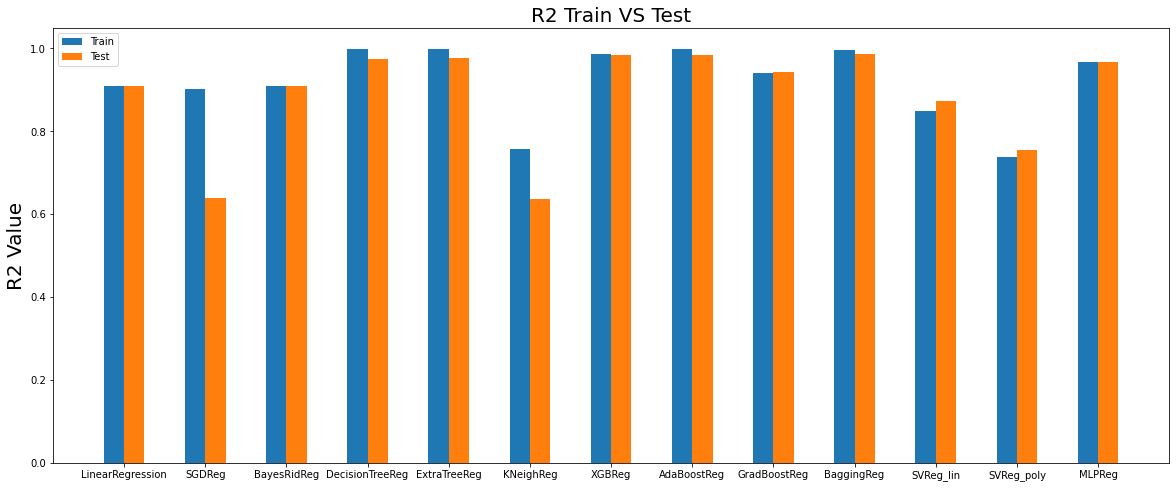

In [ ]:
r2train = dt_clfs_tot['R2_train'].values.tolist()
r2test = dt_clfs_tot['R2_test'].values.tolist()

fig, ax = plt.subplots(figsize=(20,8))
width=0.25
i = np.arange(len(r2train))
train_bar = ax.bar(i, r2train, width, label='Train')
test_bar = ax.bar(i+width, r2test,width,label='Test')
ax.set_xticks(i + width / 2)

ax.set_ylabel('R2 Value',fontsize=20)
ax.set_title('R2 Train VS Test',fontsize=20)
ax.set_xticklabels(dt_clfs_tot['Name'])

plt.legend()
plt.show()

Ottimi risultati per quanto riguarda R2 score, al primo posto troviamo il BaggingRegressor con un R2 score sul test set pari a 0.985608, seguito da XGBRegressor con 0.983725.

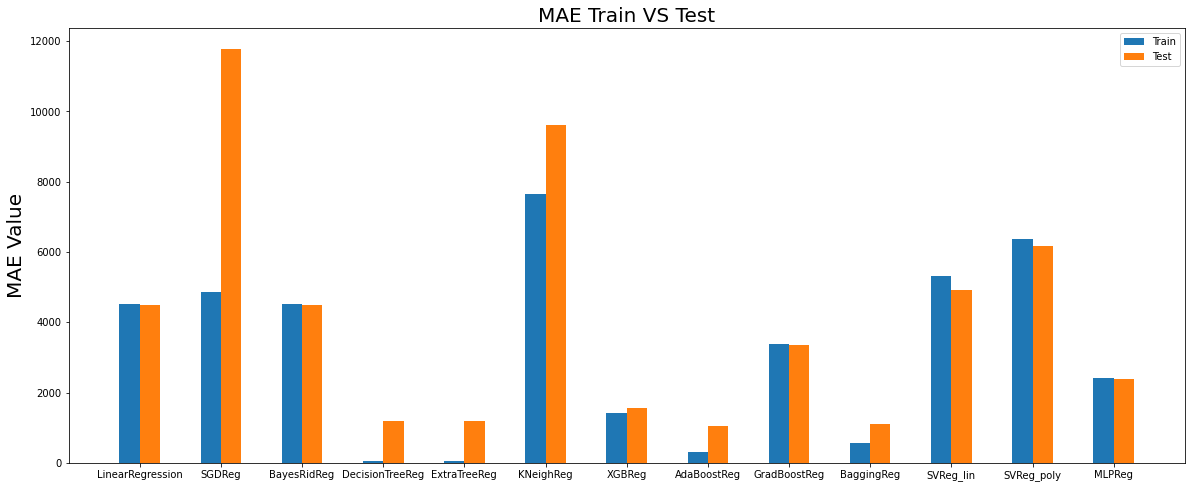

In [ ]:
maetrain = dt_clfs_tot['MAE_train'].values.tolist()
maetest = dt_clfs_tot['MAE_test'].values.tolist()

fig, ax = plt.subplots(figsize=(20,8))
width=0.25
i = np.arange(len(maetrain))
train_bar = ax.bar(i, maetrain, width, label='Train')
test_bar = ax.bar(i+width, maetest,width,label='Test')
ax.set_xticks(i + width / 2)

ax.set_ylabel('MAE Value',fontsize=20)
ax.set_title('MAE Train VS Test',fontsize=20)
ax.set_xticklabels(dt_clfs_tot['Name'])

plt.legend()
plt.show()

Per quanto riguarda il MAE sempre considerando il test set troviamo al primo posto Adaboost Regressor con 1061.19, seguito sempre dal Bagging con 1114.76

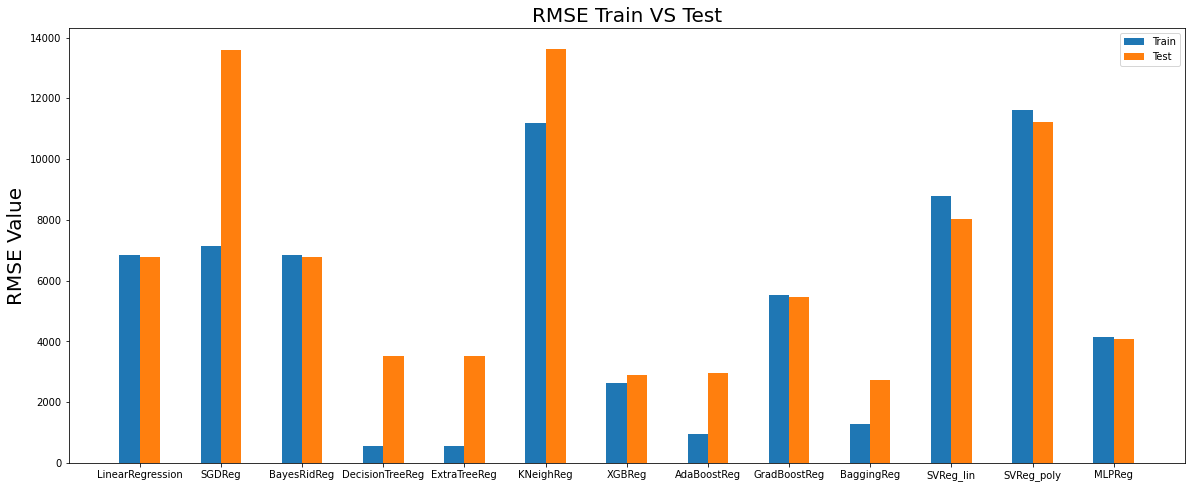

In [ ]:
msetrain = dt_clfs_tot['RMSE_train'].values.tolist()
msetest = dt_clfs_tot['RMSE_test'].values.tolist()

fig, ax = plt.subplots(figsize=(20,8))
width=0.25
i = np.arange(len(msetrain))
train_bar = ax.bar(i, msetrain, width, label='Train')
test_bar = ax.bar(i+width, msetest,width,label='Test')
ax.set_xticks(i + width / 2)

ax.set_ylabel('RMSE Value',fontsize=20)
ax.set_title('RMSE Train VS Test',fontsize=20)
ax.set_xticklabels(dt_clfs_tot['Name'])

plt.legend()
plt.show()

Anche in questo caso il miglior comportamento lo otteniamo dal Bagging con un RMSE pari a 2716, seguito da Adaboost con 2943.

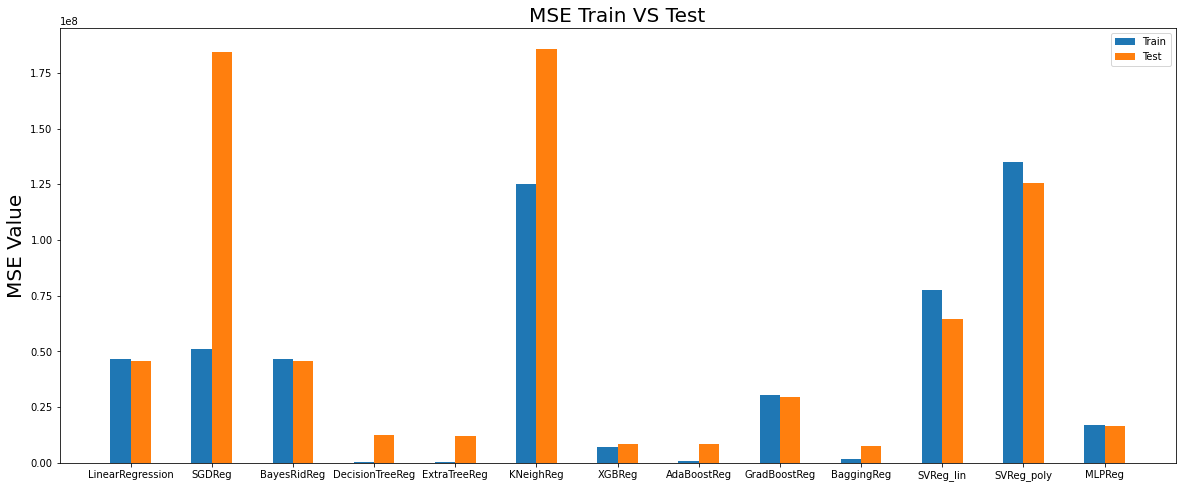

In [ ]:
msetrain = dt_clfs_tot['MSE_train'].values.tolist()
msetest = dt_clfs_tot['MSE_test'].values.tolist()

fig, ax = plt.subplots(figsize=(20,8))
width=0.25
i = np.arange(len(msetrain))
train_bar = ax.bar(i, msetrain, width, label='Train')
test_bar = ax.bar(i+width, msetest,width,label='Test')
ax.set_xticks(i + width / 2)

ax.set_ylabel('MSE Value',fontsize=20)
ax.set_title('MSE Train VS Test',fontsize=20)
ax.set_xticklabels(dt_clfs_tot['Name'])

plt.legend()
plt.show()

In conclusione, vediamo graficamente la predizione con il Bagging.

In [ ]:
import pickle
bagging= pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Data Mining/Progetto/Saved_models/BaggingReg', 'rb'))

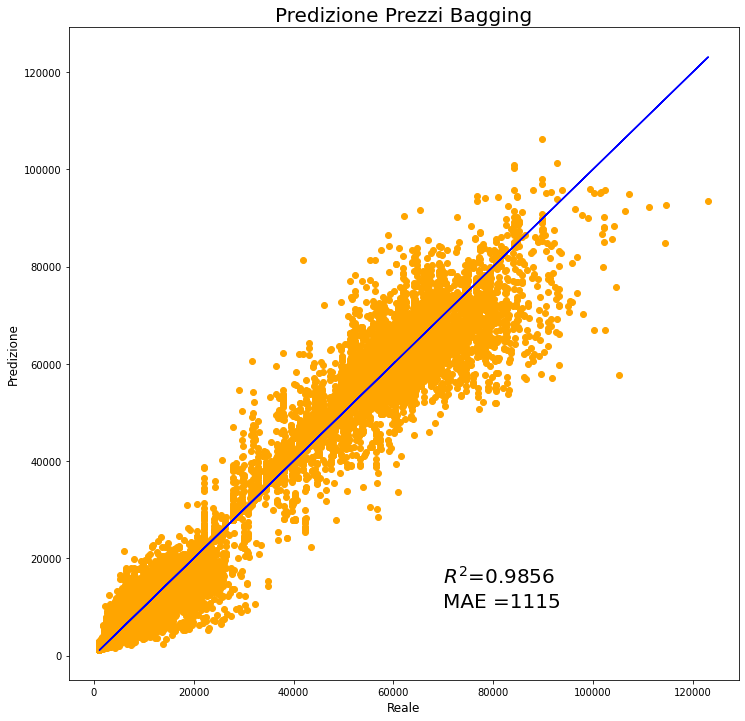

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(12,12))
ax.set_title("Predizione Prezzi Bagging",fontsize=20)
ax.set_ylabel('Predizione',fontsize=12)
ax.set_xlabel('Reale',fontsize=12)
ax.scatter(ytest,ypred, c='orange')
ax.plot(ytest,ytest,c='blue',label='y=x')

score_r2 = r2_score(ytest, ypred) 
score_mae = mean_absolute_error(ytest, ypred)
plt.text(70000,15000,'$ R^{2} $=' + str(round(score_r2, 4)),fontsize=20)
plt.text(70000,10000,'MAE =' + str(round(score_mae)),fontsize=20)
plt.show()

# Preprocessing alternativo

Per cercare di migliorare le performance ottenute sono stati fatti diversi tentativi andando a modificare il preprocessing, in particolare provando ad utilizzare onehotencoder , a trasformare la durata del volo in minuti, e a non normalizzare tra 0e1 duration e daysleft, ma senza ottenere alcun miglioramento tale da giustificare un cambio di rotta. Si riporta comunque il codice per completezza.

In [ ]:
df=pd.read_csv(os.path.join(PATH, 'csv_dataset_cleaned.csv'))
df=df.drop('Unnamed: 0',axis=1)

In [ ]:
df.head()

,class,airline,flight,dep_time,from,duration,stop,arr_time,to,price,days_left
0,Economy,SpiceJet,SG-8709,Evening,Delhi,2.10,zero,Night,Mumbai,5953,1
1,Economy,SpiceJet,SG-8157,Early_Morning,Delhi,2.20,zero,Morning,Mumbai,5953,1
2,Economy,AirAsia,I5-764,Early_Morning,Delhi,2.10,zero,Early_Morning,Mumbai,5956,1
3,Economy,Vistara,UK-995,Morning,Delhi,2.15,zero,Morning,Mumbai,5955,1
4,Economy,Vistara,UK-963,Morning,Delhi,2.20,zero,Morning,Mumbai,5955,1


In [ ]:
dfP = df.drop(["flight"],axis=1)

dfP["stop"] = dfP["stop"].replace({'zero ':0,'one':1,'two_or_more':2})
dfP["class"] = dfP["class"].replace({'Economy':0,'Business':1})

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
vars = ['duration', 'days_left']
dfP[vars] = scaler.fit_transform(dfP[vars])

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder,KBinsDiscretizer
from sklearn.pipeline import Pipeline

In [ ]:
def f(x):
  a,b=divmod(x,1)
  x2=(a*60)+(b*100)
  return x2


In [ ]:
dfP2=dfP.copy()
dfP2['duration']=dfP2['duration'].apply(f)
dfP2.head()

,class,airline,dep_time,from,duration,stop,arr_time,to,price,days_left
0,0,SpiceJet,Evening,Delhi,3.265306,0,Night,Mumbai,5953,0.0
1,0,SpiceJet,Early_Morning,Delhi,3.469388,0,Morning,Mumbai,5953,0.0
2,0,AirAsia,Early_Morning,Delhi,3.265306,0,Early_Morning,Mumbai,5956,0.0
3,0,Vistara,Morning,Delhi,3.367347,0,Morning,Mumbai,5955,0.0
4,0,Vistara,Morning,Delhi,3.469388,0,Morning,Mumbai,5955,0.0


In [ ]:
dfP3=dfP2.copy()
ohe = OneHotEncoder(sparse=False)
dfP3['airline']=ohe.fit_transform(dfP2['airline'].values.reshape(-1, 1))

In [ ]:
xds, yds = dfP2.loc[:, ['class','airline', 'dep_time','from', 'duration','stop','arr_time','to','days_left']], dfP2.loc[:,["price"]]

In [ ]:
oneHot = OneHotEncoder(sparse = False)

pipe1 = Pipeline([
        ('onehot',oneHot)
    ])
pipe1_res = pipe1.fit_transform(dfP2[["airline"]])

pipe2 = Pipeline([
        ('onehot',oneHot)
    ])
pipe2_res = pipe1.fit_transform(dfP2[["dep_time"]])

pipe3 = Pipeline([
        ('onehot',oneHot)
    ])
pipe3_res = pipe1.fit_transform(dfP2[["from"]])

pipe4 = Pipeline([
        ('onehot',oneHot)
    ])
pipe4_res = pipe1.fit_transform(dfP2[["arr_time"]])

pipe5 = Pipeline([
        ('onehot',oneHot)
    ])
pipe5_res = pipe1.fit_transform(dfP2[["to"]])


In [ ]:
from sklearn.compose import ColumnTransformer

full_pipeline = ColumnTransformer([
       ("pipe1", pipe1, ["airline"]),
        ("pipe2", pipe2, ["dep_time"]),
        ("pipe3", pipe3, ["from"]),
        ("pipe4", pipe4, ["arr_time"]),
        ("pipe5", pipe5, ["to"])],remainder='passthrough')

X, Y = full_pipeline.fit_transform(xds), yds.values.reshape(-1)

In [ ]:
X=dfP3.drop(['price'],axis=1)
Y=dfP3['price']

In [ ]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(240127, 34) (240127,)
(60032, 34) (60032,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regr = LinearRegression()
regr.fit(xtrain,ytrain)

mean_squared_error(ytest, regr.predict(xtest))

45912857.095098935

In [ ]:
#questo senza trasformare la durata in minuti e normalizzando 0-1 daysleft e duration
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

regr = LinearRegression()
regr.fit(xtrain,ytrain)

mean_squared_error(ytest, regr.predict(xtest))

45909395.107543044

# RandomForest per valutazione sulle top features




In [ ]:
import pickle
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, cross_validate

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor()
rfr.fit(X,Y)
attributes= X.columns
importances = rfr.feature_importances_

with open('/content/drive/MyDrive/Colab Notebooks/Data Mining/Progetto/Saved_models/importances','wb') as f: 
    pickle.dump(importances, f)

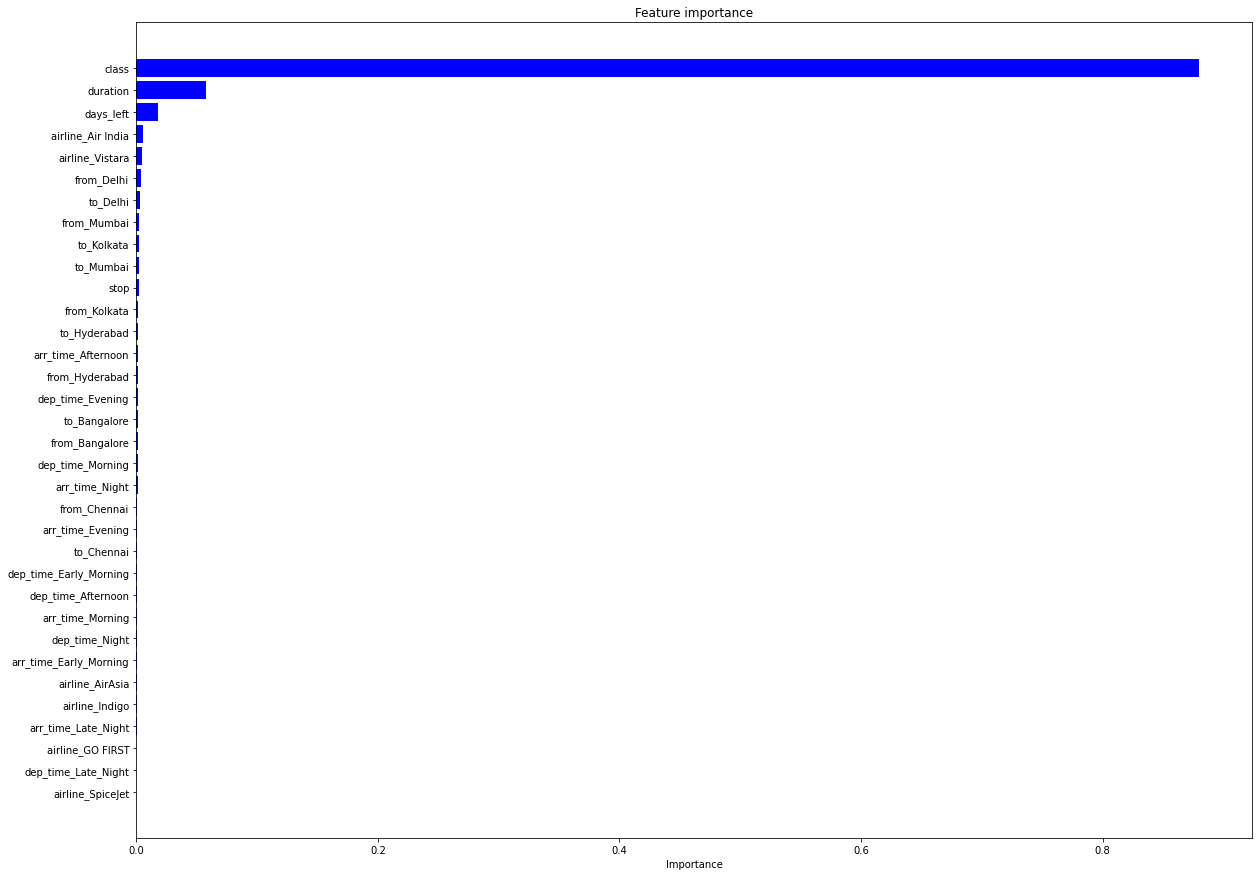

In [ ]:
index = np.argsort(importances)
plt.figure(figsize=(20,15))
plt.rc('font')
plt.title("Feature importance")
p = plt.barh(range(len(importances)), importances[index], color='b', align='center')
plt.yticks(range(len(importances)), attributes[index])
plt.xlabel("Importance")
plt.show()

Proviamo ad effettuare una valutazione dei migliori modelli sulle top3 features ottenute con RandomForest: class, duration e days_left.

In [ ]:
k = 3
attr= index[-k:]

In [ ]:
X=X.iloc[:,attr]
X.head()

,days_left,duration,class
0,1,2.10,0
1,1,2.20,0
2,1,2.10,0
3,1,2.15,0
4,1,2.20,0


Normalization and splitting

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
vars = ['duration', 'days_left']
X[vars] = scaler.fit_transform(X[vars])

In [ ]:
from sklearn.model_selection import train_test_split

print(X.shape, Y.shape)

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=0)
print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(300159, 3) (300159,)
(240127, 3) (240127,)
(60032, 3) (60032,)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
grid_searching(k_feature=True, model=model, name='LinearReg', xtrain=xtrain, xtest=xtest, ytest=ytest, ytrain=ytrain)

In [ ]:
from sklearn.linear_model import SGDRegressor

params_ = {
    'alpha' : [0.1],
    'loss' : ['squared_epsilon_insensitive']
}
estimator = SGDRegressor()
grid_searching(k_feature=True, model=estimator, name='SGDReg', params=params_, xtrain=xtrain, xtest=xtest, ytest=ytest, ytrain=ytrain)

In [ ]:
from sklearn.linear_model import BayesianRidge

params_ = {
    'alpha_1' : [0.0001]
}
estimator = BayesianRidge()
grid_searching(k_feature=True, model=estimator, name='BayesRidReg', params=params_,xtrain=xtrain, xtest=xtest, ytest=ytest, ytrain=ytrain)

In [ ]:
from xgboost import XGBRegressor

estimator=XGBRegressor()

grid_searching(k_feature=True, model=estimator, name='XGBReg',  xtrain=xtrain, xtest=xtest, ytest=ytest, ytrain=ytrain)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

params_ = {
    'n_estimators' : [5, 10, 25]
}
estimator=AdaBoostRegressor()
grid_searching(k_feature=True, model=estimator, name='AdaBoostReg', params=params_, xtrain=xtrain, xtest=xtest, ytest=ytest, ytrain=ytrain)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

params_ = {
    'n_estimators' : [5, 10, 25, 30]
}
estimator=GradientBoostingRegressor()
grid_searching(k_feature=True, model=estimator, name='GradBoostReg', params=params_, xtrain=xtrain, xtest=xtest, ytest=ytest, ytrain=ytrain)

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

params_ = {
    'n_estimators' : [50],
    'base_estimator' : [DecisionTreeRegressor(max_depth=25)]
}
estimator=BaggingRegressor()
grid_searching(k_feature=True, model=estimator, name='BaggingReg', params=params_, xtrain=xtrain, xtest=xtest, ytest=ytest, ytrain=ytrain)

In [ ]:
from sklearn.svm import SVR

model = SVR(kernel='poly', degree=2, gamma='auto')
grid_searching(k_feature=True, model=model, name='SVReg_poly',xtrain=xtrain, xtest=xtest, ytest=ytest, ytrain=ytrain)

In [ ]:
from sklearn.neural_network import MLPRegressor

params_ = {
    'hidden_layer_sizes' : [(50,100, )],
    'learning_rate' : ['adaptive']
}
estimator = MLPRegressor()
grid_searching(k_feature=True, model=estimator, name='MLPReg', params=params_,xtrain=xtrain, xtest=xtest, ytest=ytest, ytrain=ytrain)

In [ ]:
from sklearn.svm import SVR

model = SVR(kernel='linear',gamma='auto')
grid_searching(k_feature=False, model=model, name='SVReg_lin',xtrain=xtrain, xtest=xtest, ytest=ytest, ytrain=ytrain)

In [ ]:
dt_clfs_top_tot = pd.DataFrame(df_clfs_top)
dt_clfs_top_tot

,Name,Type,R2_train,R2_test,MAE_train,MAE_test,MSE_train,MSE_test
0,top3_LinearReg,LinearRegression(),0.890826,0.892083,4537.990285,4507.940490,5.630982e+07,5.533871e+07
1,top3_SGDReg,"SGDRegressor(alpha=0.1, loss='squared_epsilon_...",0.857290,0.861180,6016.534620,5966.170665,7.360662e+07,7.118535e+07
2,top3_BayesRidReg,BayesianRidge(alpha_1=0.0001),0.890826,0.892083,4537.990025,4507.940331,5.630982e+07,5.533871e+07
3,top3_XGBReg,XGBRegressor(missing=nan),0.933592,0.934656,3467.230352,3446.266839,3.425194e+07,3.350772e+07
4,top3_AdaBoostReg,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.926811,0.927052,3710.065895,3712.032987,3.774932e+07,3.740670e+07
5,top3_GradBoostReg,([DecisionTreeRegressor(criterion='friedman_ms...,0.929949,0.931447,3634.798286,3608.448773,3.613080e+07,3.515310e+07
6,top3_BaggingReg,"(DecisionTreeRegressor(max_depth=25, random_st...",0.947528,0.924866,3104.944441,3665.111792,2.706374e+07,3.852806e+07
7,top3_SVReg_poly,"SVR(degree=2, gamma='auto', kernel='poly')",0.173711,0.275528,12598.911118,11776.341226,4.261821e+08,3.715009e+08
8,top3_MLPReg,"MLPRegressor(hidden_layer_sizes=(50, 100), lea...",0.914772,0.931237,3946.956153,3558.647540,4.395071e+07,3.526089e+07
9,top3_SVReg_lin,"SVR(gamma='auto', kernel='linear')",0.829711,0.854967,5693.176667,5280.351265,8.783145e+07,7.437151e+07


Aggiungiamo anche qui calcolo RMSE


In [ ]:
dt_clfs_top_tot['RMSE_train']=np.sqrt(dt_clfs_top_tot['MSE_train'])
dt_clfs_top_tot['RMSE_test']=np.sqrt(dt_clfs_top_tot['MSE_test'])
dt_clfs_top_tot

,Name,Type,R2_train,R2_test,MAE_train,MAE_test,MSE_train,MSE_test,RMSE_train,RMSE_test
0,top3_LinearReg,LinearRegression(),0.890826,0.892083,4537.990285,4507.940490,5.630982e+07,5.533871e+07,7503.986621,7438.999583
1,top3_SGDReg,"SGDRegressor(alpha=0.1, loss='squared_epsilon_...",0.857290,0.861180,6016.534620,5966.170665,7.360662e+07,7.118535e+07,8579.430105,8437.140947
2,top3_BayesRidReg,BayesianRidge(alpha_1=0.0001),0.890826,0.892083,4537.990025,4507.940331,5.630982e+07,5.533871e+07,7503.986621,7438.999286
3,top3_XGBReg,XGBRegressor(missing=nan),0.933592,0.934656,3467.230352,3446.266839,3.425194e+07,3.350772e+07,5852.515893,5788.584974
4,top3_AdaBoostReg,"(DecisionTreeRegressor(max_depth=3, random_sta...",0.926811,0.927052,3710.065895,3712.032987,3.774932e+07,3.740670e+07,6144.047721,6116.101668
5,top3_GradBoostReg,([DecisionTreeRegressor(criterion='friedman_ms...,0.929949,0.931447,3634.798286,3608.448773,3.613080e+07,3.515310e+07,6010.889873,5929.005236
6,top3_BaggingReg,"(DecisionTreeRegressor(max_depth=25, random_st...",0.947528,0.924866,3104.944441,3665.111792,2.706374e+07,3.852806e+07,5202.281726,6207.097603
7,top3_SVReg_poly,"SVR(degree=2, gamma='auto', kernel='poly')",0.173711,0.275528,12598.911118,11776.341226,4.261821e+08,3.715009e+08,20644.179309,19274.359403
8,top3_MLPReg,"MLPRegressor(hidden_layer_sizes=(50, 100), lea...",0.914772,0.931237,3946.956153,3558.647540,4.395071e+07,3.526089e+07,6629.533182,5938.087946
9,top3_SVReg_lin,"SVR(gamma='auto', kernel='linear')",0.829711,0.854967,5693.176667,5280.351265,8.783145e+07,7.437151e+07,9371.843529,8623.891777


# Confronto tra TOP3 e ALL features

In [ ]:
all = pd.concat([dt_clfs_tot.iloc[0:3], dt_clfs_tot.iloc[6:10], dt_clfs_tot.iloc[11:13],dt_clfs_tot.iloc[10:11]],ignore_index=True)

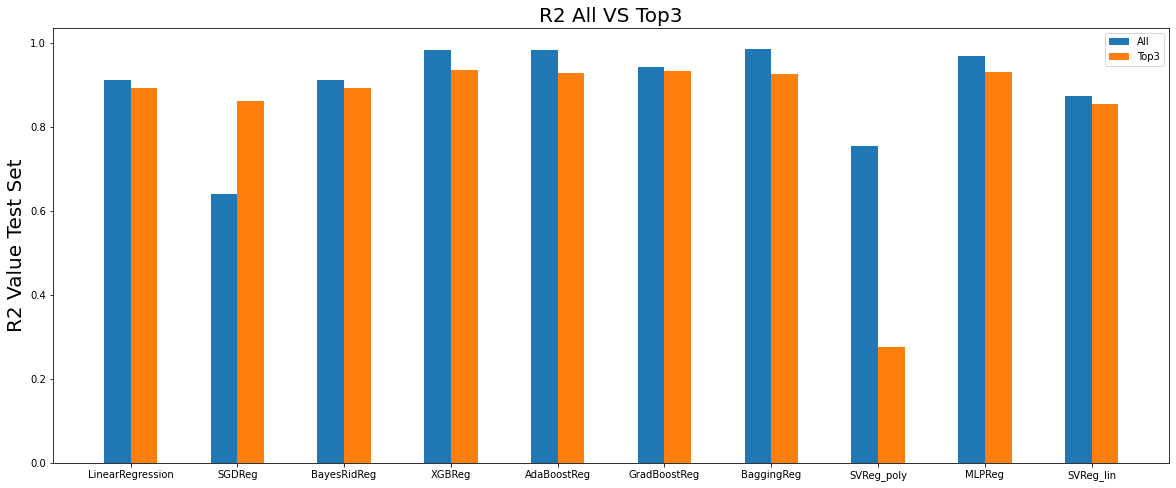

In [ ]:
all_test = all['R2_test'].values.tolist()
top_test = dt_clfs_top_tot['R2_test'].values.tolist()

fig, ax = plt.subplots(figsize=(20,8))
width=0.25
i = np.arange(len(all_test))
train_bar = ax.bar(i, all_test, width, label='All')
test_bar = ax.bar(i+width, top_test,width,label='Top3')
ax.set_xticks(i + width / 2)

ax.set_ylabel('R2 Value Test Set',fontsize=20)
ax.set_title('R2 All VS Top3',fontsize=20)
ax.set_xticklabels(all['Name'])

plt.legend()
plt.show()

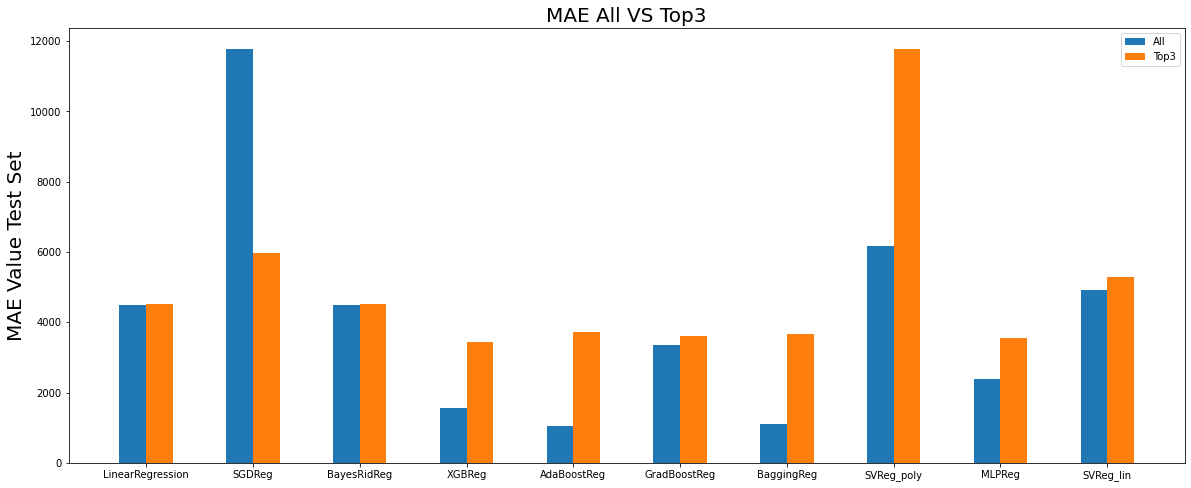

In [ ]:
all_test = all['MAE_test'].values.tolist()
top_test = dt_clfs_top_tot['MAE_test'].values.tolist()

fig, ax = plt.subplots(figsize=(20,8))
width=0.25
i = np.arange(len(all_test))
train_bar = ax.bar(i, all_test, width, label='All')
test_bar = ax.bar(i+width, top_test,width,label='Top3')
ax.set_xticks(i + width / 2)

ax.set_ylabel('MAE Value Test Set',fontsize=20)
ax.set_title('MAE All VS Top3',fontsize=20)
ax.set_xticklabels(all['Name'])

plt.legend()
plt.show()

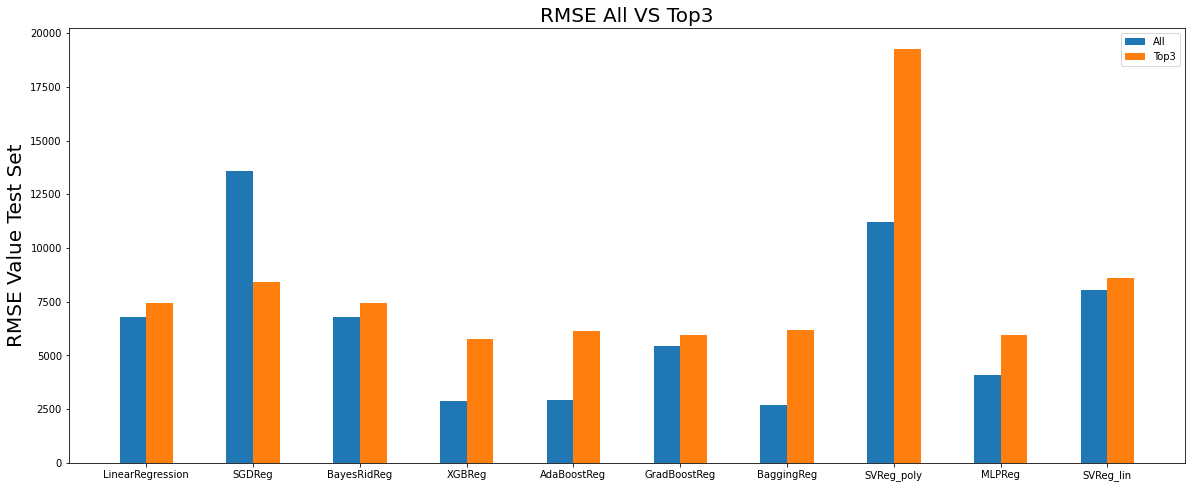

In [ ]:
all_test = all['RMSE_test'].values.tolist()
top_test = dt_clfs_top_tot['RMSE_test'].values.tolist()

fig, ax = plt.subplots(figsize=(20,8))
width=0.25
i = np.arange(len(all_test))
train_bar = ax.bar(i, all_test, width, label='All')
test_bar = ax.bar(i+width, top_test,width,label='Top3')
ax.set_xticks(i + width / 2)

ax.set_ylabel('RMSE Value Test Set',fontsize=20)
ax.set_title('RMSE All VS Top3',fontsize=20)
ax.set_xticklabels(all['Name'])

plt.legend()
plt.show()

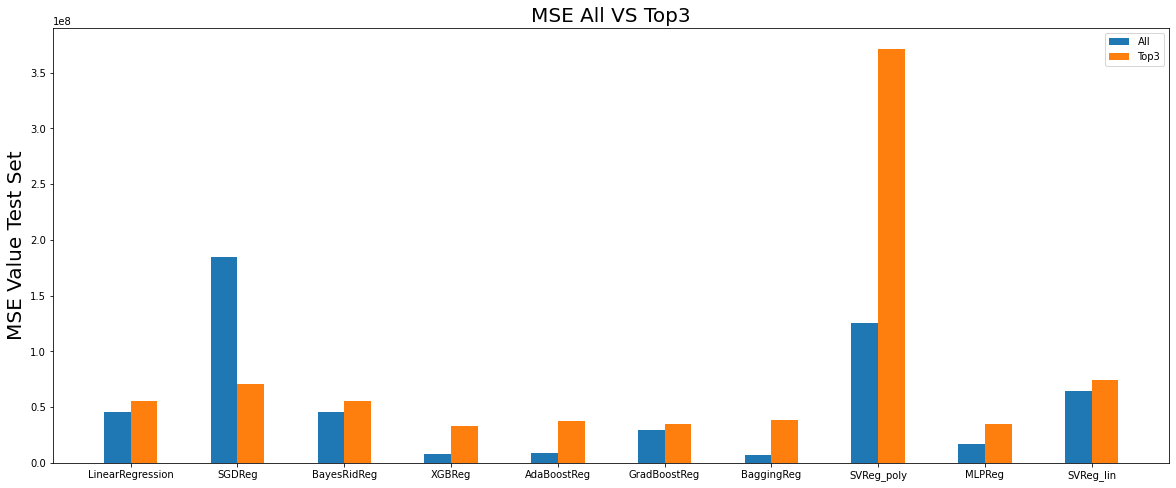

In [ ]:
all_test = all['MSE_test'].values.tolist()
top_test = dt_clfs_top_tot['MSE_test'].values.tolist()

fig, ax = plt.subplots(figsize=(20,8))
width=0.25
i = np.arange(len(all_test))
train_bar = ax.bar(i, all_test, width, label='All')
test_bar = ax.bar(i+width, top_test,width,label='Top3')
ax.set_xticks(i + width / 2)

ax.set_ylabel('MSE Value Test Set',fontsize=20)
ax.set_title('MSE All VS Top3',fontsize=20)
ax.set_xticklabels(all['Name'])

plt.legend()
plt.show()

L'analisi sulle top3 features non porta miglioramenti in riferimento a nessuna metrica, l'unico modello che sembra performare meglio rispetto alla versione completa è l'SGDRegressor.

# Valutazione senza includere l'attributo "Classe"

Visto e considerato che la variabile dipendente ha una forte correlazione con l'attributo "Classe", proviamo ora ad escludere quest'ultimo per vedere come variano le performance del nostro modello migliore utilizzando solo le rimanenti variabili indipendenti.

In [ ]:
dfP=pd.read_csv(os.path.join(PATH, 'dfP.csv'))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
vars = ['duration', 'days_left']
dfP[vars] = scaler.fit_transform(dfP[vars])

In [ ]:
X=dfP.drop(['price','class'],axis=1)
Y=dfP['price']

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=0)

print(xtrain.shape, ytrain.shape)
print(xtest.shape, ytest.shape)

(240127, 33) (240127,)
(60032, 33) (60032,)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

params_ = {
    'n_estimators' : [25],
    'base_estimator' : [DecisionTreeRegressor(max_depth=25)]
}

estimator=BaggingRegressor()
grid_searching(k_feature=False, model=estimator, name='BaggingReg', params=params_, xtrain=xtrain, xtest=xtest, ytest=ytest, ytrain=ytrain)

In [ ]:
dt_clfs_tot = pd.DataFrame(df_clfs)
dt_clfs_tot

,Name,Type,R2_train,R2_test,MAE_train,MAE_test,MSE_train,MSE_test,RMSE_train,RMSE_test
0,BaggingReg,"(DecisionTreeRegressor(max_depth=25, random_st...",0.560892,0.119387,10510.831817,17586.755672,2.264822e+08,5.740092e+08,15049.324366,23958.489414


In [ ]:
df_clfs_all= pickle.load(open('/content/drive/MyDrive/Colab Notebooks/Data Mining/Progetto/Saved_models/df_clfs', 'rb'))
df_bag_old = pd.DataFrame(df_clfs_all)
df_bag=df_bag_old[9:10].copy()
dt_clfs_tot['Name']='NclassBag'
df_bag['Name']='YclassBag'

Confronto con Bagging addestrato anche su Classe

In [ ]:
df=pd.concat([df_bag, dt_clfs_tot], axis=0, ignore_index=True)
df

,Name,Type,R2_train,R2_test,MAE_train,MAE_test,MSE_train,MSE_test,RMSE_train,RMSE_test
0,YclassBag,"(DecisionTreeRegressor(max_depth=25, random_st...",0.996759,0.985608,551.906838,1114.760053,1.671819e+06,7.379883e+06,1292.988485,2716.594008
1,NclassBag,"(DecisionTreeRegressor(max_depth=25, random_st...",0.560892,0.119387,10510.831817,17586.755672,2.264822e+08,5.740092e+08,15049.324366,23958.489414


Rimuovendo l'attributo Classe dal modello di classificazione i risultati sono significativamente peggiorati, il che dimostra quanto questo attributo è fortemente correlato all'attributo target ed è importante ai fini della predizione.

#Valutazione separata su Economy e Business

In [ ]:
dfP=pd.read_csv(os.path.join(PATH, 'dfP.csv'))
dfP=dfP.drop('Unnamed: 0',axis=1)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
vars = ['duration', 'days_left']
dfP[vars] = scaler.fit_transform(dfP[vars])

In [ ]:
dfP.shape

(300159, 35)

In [ ]:
dfPEco=dfP[dfP['class']==0].copy()
dfPBus=dfP[dfP['class']==1].copy()
dfPBus.reset_index()

In [ ]:
Xeco=dfPEco.drop(['price'],axis=1)
Yeco=dfPEco['price']

xEtrain, xEtest, yEtrain, yEtest = train_test_split(Xeco, Yeco, test_size=0.2, random_state=0)

print(xEtrain.shape, yEtrain.shape)
print(xEtest.shape, yEtest.shape)

(165337, 34) (165337,)
(41335, 34) (41335,)


In [ ]:
Xbus=dfPBus.drop(['price'],axis=1)
Ybus=dfPBus['price']

xBtrain, xBtest, yBtrain, yBtest = train_test_split(Xbus, Ybus, test_size=0.2, random_state=0)

print(xBtrain.shape, yBtrain.shape)
print(xBtest.shape, yBtest.shape)

(74789, 34) (74789,)
(18698, 34) (18698,)


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

params_ = {
    'n_estimators' : [25],
    'base_estimator' : [DecisionTreeRegressor(max_depth=25)]
}

estimator=BaggingRegressor()
grid_searching(k_feature=False, model=estimator, name='EconomyBag', params=params_, xtrain=xEtrain, xtest=xEtest, ytest=yEtest, ytrain=yEtrain)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor

params_ = {
    'n_estimators' : [25],
    'base_estimator' : [DecisionTreeRegressor(max_depth=25)]
}

estimator=BaggingRegressor()
grid_searching(k_feature=False, model=estimator, name='BusinessBag', params=params_, xtrain=xBtrain, xtest=xBtest, ytest=yBtest, ytrain=yBtrain)

In [ ]:
df_economy = pd.DataFrame(df_clfs)
df_economy

,Name,Type,R2_train,R2_test,MAE_train,MAE_test,MSE_train,MSE_test,RMSE_train,RMSE_test
0,EconomyBag,"(DecisionTreeRegressor(max_depth=25, random_st...",0.963148,0.841692,336.58442,669.927859,517524.890949,2.199879e+06,719.392029,1483.198994


In [ ]:
df_business = pd.DataFrame(df_clfs)
df_business

,Name,Type,R2_train,R2_test,MAE_train,MAE_test,MSE_train,MSE_test,RMSE_train,RMSE_test
0,BusinessBag,"(DecisionTreeRegressor(max_depth=25, random_st...",0.975545,0.883086,957.991467,2093.957001,4.116131e+06,1.961079e+07,2028.825075,4428.407305


In [ ]:
df_final=pd.concat([df_bag, df_economy,df_business], axis=0, ignore_index=True)
df_final

,Name,Type,R2_train,R2_test,MAE_train,MAE_test,MSE_train,MSE_test,RMSE_train,RMSE_test
0,FullClass,"(DecisionTreeRegressor(max_depth=25, random_st...",0.996759,0.985608,551.906838,1114.760053,1.671819e+06,7.379883e+06,1292.988485,2716.594008
1,EconomyBag,"(DecisionTreeRegressor(max_depth=25, random_st...",0.963148,0.841692,336.584420,669.927859,5.175249e+05,2.199879e+06,719.392029,1483.198994
2,BusinessBag,"(DecisionTreeRegressor(max_depth=25, random_st...",0.975545,0.883086,957.991467,2093.957001,4.116131e+06,1.961079e+07,2028.825075,4428.407305


Facendo una valutazione sulle singole classi si può notare che il dataset contenente solo record di classe Economy riesce ad ottenere risultati migliori in termini di MAE, MSE ed RMSE rispetto al dataset completo. Peggiora invece l'R2 test scendendo da 0.98 a 0.84.

Per quanto riguarda il dataset Business otteniamo sul test set un R2 di 0.88, ma valori sensibilmente più alti rispetto al dataset completo sulle altre misure.

-----------------------

Confrontiamo ora il MAE sul test ottenuto con il prezzo medio dei ticket per capire se è un errore accettabile o meno

In [ ]:
dfM=df_final['Name'].copy()
dfmf=pd.DataFrame(dfM)

In [ ]:
dfMeans={'Prezzo_medio':[ dfP['price'].mean(), dfPEco['price'].mean(), dfPBus['price'].mean()]} 
dfMeans=pd.DataFrame(dfMeans)

In [ ]:
dfmf=pd.concat([dfmf, df_final['MAE_test'],dfMeans], axis=1 )
dfmf.head()

,Name,MAE_test,Prezzo_medio
0,FullClass,1114.760053,20889.368728
1,EconomyBag,669.927859,6572.334249
2,BusinessBag,2093.957001,52540.081124


Rapportando i risultati sul ds della classe Economy abbiamo una differenza tra MAE calcolato e prezzo medio superiore rispetto a quella sul ds Business.

# Stacking

Proviamo infine ad utilizzare la tecnica dello stacking, un metodo ensemble learning per cercare di dare un piccolo boost alle performance.

Utilizzeremo come base models i 6 con cui in predecenza abbiamo ottenuto i risultati migliori: 

*XGBRegressor, AdaBoostRegressor, GradientBoostingRegressor, MLPRegressor, SVR e LinearRegressor.*

Una volta ottenute le nuove features andremo ad utilizzare il nostro modello migliore, il BaggingRegressor, per effettuare la predizione finale utilizzando le features ottenute.

Inanzitutto definiamo la funzione per effettuare lo stacking dell'input. 

Questa funzione utilizza una 5cross validation per l'addestramento e le predizioni su train e test data che verranno poi usato come nuove features.

In [ ]:
from sklearn.model_selection import KFold

SEED = 0
ntrain = xtrain.shape[0]
ntest = xtest.shape[0]
n_fold=5

folds = KFold(n_splits=n_fold,random_state=SEED, shuffle=True)

def Stacking(model,train,y,test):

  train_pred=np.zeros((ntrain,))
  test_pred=np.zeros((ntest,))
  oof_test = np.empty((n_fold, ntest))

  for i, (train_index, test_index) in enumerate(folds.split(train)):

    x_tr=train[train_index] #n-1 fold su cui fare train
    y_tr=y[train_index]
    x_te=train[test_index]  #fold da predire

    model.fit(x_tr,y_tr)

    train_pred[test_index]= model.predict(x_te)
    oof_test[i, :] = model.predict(test)

  test_pred[:] = oof_test.mean(axis=0)  
  return train_pred.reshape(-1,1),test_pred.reshape(-1,1)

In [ ]:
import pickle

Addestriamo ora i base models.

In [ ]:
import pickle
from sklearn.linear_model import LinearRegression 
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

# inizializzazione base models


model_1 = XGBRegressor(n_jobs=5, learning_rate=0.1, max_depth=10,random_state=1)
model_2 = AdaBoostRegressor()
model_3=GradientBoostingRegressor(n_estimators=30)
model_4 = MLPRegressor()
model_5 = SVR(kernel='linear',gamma='auto')
model_6 = LinearRegression()


train_pred_1,test_pred_1=Stacking(model=model_1,train=xtrain.values,test=xtest.values,y=ytrain.ravel())
train_pred_2,test_pred_2=Stacking(model=model_2,train=xtrain.values,test=xtest.values,y=ytrain.ravel())
train_pred_3,test_pred_3=Stacking(model=model_3,train=xtrain.values,test=xtest.values,y=ytrain.ravel())
train_pred_4,test_pred_4=Stacking(model=model_4,train=xtrain.values,test=xtest.values,y=ytrain.ravel())
train_pred_5,test_pred_5=Stacking(model=model_5,train=xtrain.values,test=xtest.values,y=ytrain.ravel())
train_pred_6,test_pred_6=Stacking(model=model_6,train=xtrain.values,test=xtest.values,y=ytrain.ravel())


train_pred_1=pd.DataFrame(train_pred_1)
test_pred_1=pd.DataFrame(test_pred_1)

train_pred_2=pd.DataFrame(train_pred_2)
test_pred_2=pd.DataFrame(test_pred_2)

train_pred_3=pd.DataFrame(train_pred_3)
test_pred_3=pd.DataFrame(test_pred_3)

train_pred_4=pd.DataFrame(train_pred_4)
test_pred_4=pd.DataFrame(test_pred_4)

train_pred_5=pd.DataFrame(train_pred_5)
test_pred_5=pd.DataFrame(test_pred_5)

train_pred_6=pd.DataFrame(train_pred_6)
test_pred_6=pd.DataFrame(test_pred_6)

Infine utilizziamo il Bagging, che userà le nuove features per dare una predizione finale.

**Secondo livello**

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
#prova con due base learner
df = pd.concat([train_pred_1, train_pred_2], axis=1)
df_test = pd.concat([test_pred_1, test_pred_2], axis=1)

model=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=25),n_estimators=50)
model.fit(df,ytrain)
model.score(df_test, ytest)

0.9811297776586128

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
#prova con tre
df = pd.concat([train_pred_1, train_pred_2,train_pred_3], axis=1)
df_test = pd.concat([test_pred_1, test_pred_2,test_pred_3], axis=1)

model=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=25),n_estimators=50)
model.fit(df,ytrain)
model.score(df_test, ytest)

0.9828930475561464

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
#finale
df = pd.concat([train_pred_1, train_pred_2,train_pred_3,train_pred_4,train_pred_5,train_pred_6], axis=1)
df_test = pd.concat([test_pred_1, test_pred_2,test_pred_3,test_pred_4,test_pred_5,test_pred_6], axis=1)

model=BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=25),n_estimators=50)
model.fit(df,ytrain)
model.score(df_test, ytest)

0.9847013200990073

In [ ]:
ypred=model.predict(df_test)

mean_absolute_error(ypred,ytest)

1440.2149121815817

In [ ]:
mean_squared_error(ypred,ytest)

7844990.536106263

In [ ]:
ypred=model.predict(df_test)

df = pd.DataFrame({'R2': [model.score(df_test, ytest)], 'MAE': [mean_absolute_error(ypred,ytest)],'RMSE': [mean_squared_error(ypred, ytest, squared=False)], 'MSE': [mean_squared_error(ypred,ytest)]})
df

,R2,MAE,RMSE,MSE
0,0.984701,1440.214912,2800.891025,7.844991e+06


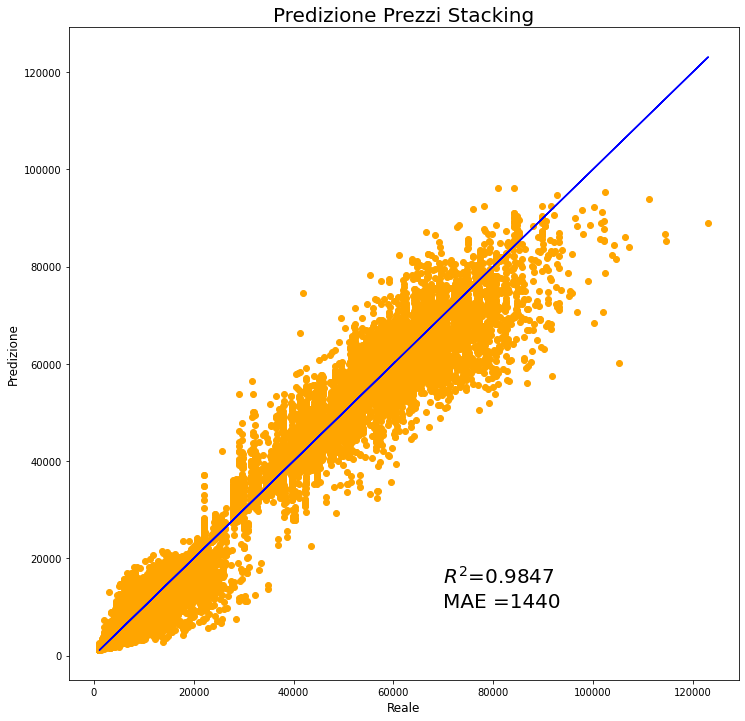

In [ ]:
import matplotlib.pyplot as plt

fig,ax = plt.subplots(figsize=(12,12))
ax.set_title("Predizione Prezzi Stacking",fontsize=20)
ax.set_ylabel('Predizione',fontsize=12)
ax.set_xlabel('Reale',fontsize=12)
ax.scatter(ytest,ypred, c='orange')
ax.plot(ytest,ytest,c='blue',label='y=x')

score_r2 = df['R2'][0]
score_mae = df['MAE'][0]
plt.text(70000,15000,'$ R^{2} $=' + str(round(score_r2, 4)),fontsize=20)
plt.text(70000,10000,'MAE =' + str(round(score_mae)),fontsize=20)
plt.show()

Possiamo concludere che in questo specifico caso lo stacking non ha portato un miglioramento sostanziale rispetto alle valutazioni precedenti, ma in generale resta comunque un'ottima opportunità per dare un piccolo boosting alle performance finali.